In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [166]:
col_names = ['timestamp', 'street_shoe_size', 'fav_sneaker_model', 'foot_len', 'foot_width', 
             'foot_type', 'foot_deform', 'shoe_brand', 'shoe_model', 'shoe_model_manual', 'climb_shoe_size', 
             'shoe_age', 'favourite', 'vorspann', 'downturn', 'asymetry', 'closure_type', 'climb_style', 
             'terrain', 'rate_fit', 'rate_comfort', 'rate_stiffness', 'use_frequency', 'climbed_grade', 
             'overall_rating','gender','height','weight', 'age','climbing_exp']

df_survey = pd.read_csv("./data/climb_shoe_survey.csv", header=0, names=col_names)
df_survey.shape

(183, 30)

In [167]:
df_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   timestamp          183 non-null    object 
 1   street_shoe_size   183 non-null    float64
 2   fav_sneaker_model  153 non-null    object 
 3   foot_len           183 non-null    float64
 4   foot_width         183 non-null    float64
 5   foot_type          183 non-null    object 
 6   foot_deform        183 non-null    object 
 7   shoe_brand         183 non-null    object 
 8   shoe_model         183 non-null    object 
 9   shoe_model_manual  8 non-null      object 
 10  climb_shoe_size    183 non-null    float64
 11  shoe_age           183 non-null    float64
 12  favourite          180 non-null    object 
 13  vorspann           183 non-null    object 
 14  downturn           183 non-null    object 
 15  asymetry           183 non-null    object 
 16  closure_type       183 non

In [168]:
df_survey.head(3)

,timestamp,street_shoe_size,fav_sneaker_model,foot_len,foot_width,foot_type,foot_deform,shoe_brand,shoe_model,shoe_model_manual,...,rate_comfort,rate_stiffness,use_frequency,climbed_grade,overall_rating,gender,height,weight,age,climbing_exp
0,24.02.2021 22:27:44,41.5,Vans Authentic,25.5,10.0,Ägyptischer Fußtyp,Nein,La Sportiva,La Sportiva - SKWAMA,NaN,...,4,4,4,Fortgeschritten (UIAA 7 - 9),5,Männlich,168,61,29,4.0
1,25.02.2021 08:26:50,38.5,Adidas cloudfoam,24.2,9.8,Römischer Fußtyp,Hallux Valgus,La Sportiva,La Sportiva - SOLUTION COMP WOMAN,NaN,...,4,3,3,Fortgeschritten (UIAA 7 - 9),4,Weiblich,168,63,30,3.0
2,25.02.2021 10:28:25,46.0,Black Diamond Mission LT,29.0,10.0,Griechischer Fußtyp,Nein,La Sportiva,La Sportiva - SKWAMA,NaN,...,4,5,5,Fortgeschritten (UIAA 7 - 9),5,Männlich,186,72,36,30.0


## Einblick in Demographie

Demographische Daten können dabei helfen, die Passform von Kletterschuhen besser zu verstehen. Daher wurden der Umfrage folgende Fragen zur Person hinzugefügt:

- Geschlecht
- Alter
- Körpergröße
- Gewicht
- Klettererfahrung (in Jahren)

In [169]:
df_survey.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
street_shoe_size,183.0,42.005464,2.809418,36.0,39.50,42.5,44.00,47.5
foot_len,183.0,26.014481,2.558732,10.2,24.65,26.2,27.55,30.5
foot_width,183.0,9.797814,0.862510,7.0,9.30,10.0,10.50,11.5
climb_shoe_size,183.0,40.783716,2.731552,29.0,38.50,41.0,43.00,46.0
shoe_age,183.0,1.953552,2.177381,0.0,1.00,1.5,2.00,22.0
rate_fit,183.0,4.224044,0.769666,2.0,4.00,4.0,5.00,5.0
rate_comfort,183.0,3.819672,1.056246,1.0,3.00,4.0,5.00,5.0
rate_stiffness,183.0,3.595628,1.064090,1.0,3.00,4.0,5.00,5.0
use_frequency,183.0,3.743169,1.229064,1.0,3.00,4.0,5.00,5.0
overall_rating,183.0,4.218579,0.774798,2.0,4.00,4.0,5.00,5.0


Männlich    122
Weiblich     61
Name: gender, dtype: int64


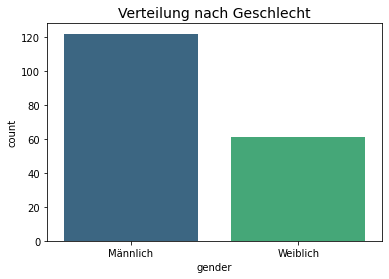

In [170]:
print(df_survey['gender'].value_counts())
sns.countplot(x='gender', data=df_survey, palette='viridis')
plt.title("Verteilung nach Geschlecht", fontsize=14)
plt.show()

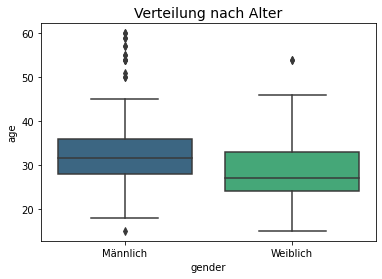

In [171]:
sns.boxplot(x='gender', y='age',data=df_survey, palette='viridis')
plt.title("Verteilung nach Alter", fontsize=14)
plt.show()

In [172]:
df_survey.groupby('gender').describe()

street_shoe_size                                                     \
                    count       mean       std   min   25%   50%   75%   max   
gender                                                                         
Männlich            122.0  43.606557  1.775906  39.0  42.5  43.5  44.5  47.5   
Weiblich             61.0  38.803279  1.394270  36.0  38.0  38.5  39.5  42.0   

         foot_len             ...   age       climbing_exp            \
            count       mean  ...   75%   max        count      mean   
gender                        ...                                      
Männlich    122.0  27.142623  ...  36.0  60.0        122.0  12.25000   
Weiblich     61.0  23.758197  ...  33.0  54.0         61.0   6.97541   

                                                
                std  min  25%  50%   75%   max  
gender                                          
Männlich  10.344330  0.5  4.0  7.5  20.0  37.0  
Weiblich   5.995433  1.5  3.0  4.0   8.0  25.0  

[2 rows x 112 columns]

In [173]:
round(df_survey.groupby('gender')['weight'].describe(),2)

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
Männlich,122.0,73.16,7.48,55.0,68.0,72.0,77.0,100.0
Weiblich,61.0,58.20,6.40,45.0,54.0,58.0,62.0,77.0


In [174]:
round(df_survey.groupby('gender')['height'].describe(),2)

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
Männlich,122.0,180.68,6.00,168.0,176.0,181.0,185.0,194.0
Weiblich,61.0,165.39,5.84,153.0,162.0,165.0,168.0,182.0


In [175]:
round(df_survey.groupby('gender')['climbing_exp'].describe(),2)

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
Männlich,122.0,12.25,10.34,0.5,4.0,7.5,20.0,37.0
Weiblich,61.0,6.98,6.00,1.5,3.0,4.0,8.0,25.0


In [176]:
round(df_survey.groupby('gender')['climbing_exp'].describe(),2)

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
Männlich,122.0,12.25,10.34,0.5,4.0,7.5,20.0,37.0
Weiblich,61.0,6.98,6.00,1.5,3.0,4.0,8.0,25.0


In [177]:
round(df_survey.groupby('gender')['street_shoe_size'].describe(),2)

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
Männlich,122.0,43.61,1.78,39.0,42.5,43.5,44.5,47.5
Weiblich,61.0,38.80,1.39,36.0,38.0,38.5,39.5,42.0


In [178]:
round(df_survey.groupby('gender')['climb_shoe_size'].describe(),2)

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
Männlich,122.0,42.16,1.91,37.5,41.0,42.0,44.0,46.0
Weiblich,61.0,38.02,1.92,29.0,37.0,38.0,39.0,42.0


In [179]:
round(df_survey.groupby('gender')['foot_len'].describe(),2)

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
Männlich,122.0,27.14,1.48,22.0,26.2,27.2,28.0,30.5
Weiblich,61.0,23.76,2.77,10.2,23.4,24.5,25.0,27.0


In [180]:
round(df_survey.groupby('gender')['foot_width'].describe(),2)

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
Männlich,122.0,10.08,0.81,7.0,9.9,10.1,10.5,11.5
Weiblich,61.0,9.23,0.66,7.5,9.0,9.4,9.8,10.0


In [181]:
df_survey['shoe_age'].describe()

count    183.000000
mean       1.953552
std        2.177381
min        0.000000
25%        1.000000
50%        1.500000
75%        2.000000
max       22.000000
Name: shoe_age, dtype: float64

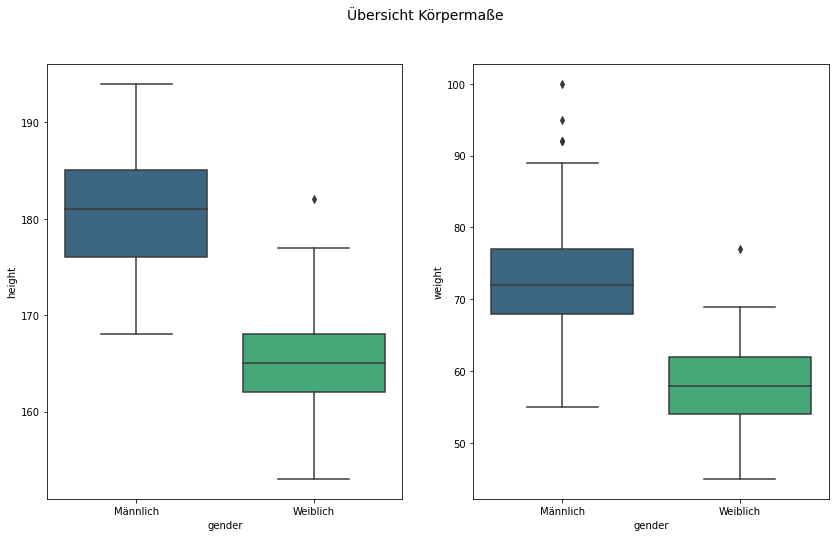

In [182]:
fig, axs = plt.subplots(1, 2, figsize=(14, 8))
fig.suptitle('Übersicht Körpermaße', fontsize=14)
sns.boxplot(x='gender', y='height',data=df_survey, palette='viridis', ax=axs[0])
sns.boxplot(x='gender', y='weight',data=df_survey, palette='viridis', ax=axs[1])
plt.show()

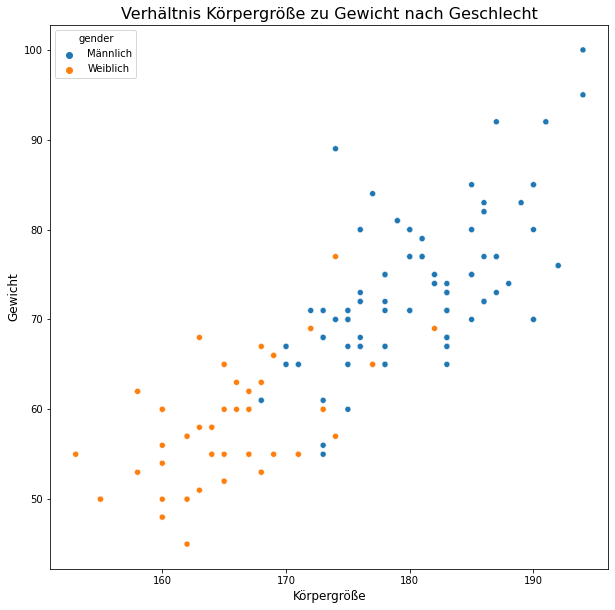

In [183]:
plt.figure(figsize=(10, 10))
plt.title('Verhältnis Körpergröße zu Gewicht nach Geschlecht', fontsize=16)
sns.scatterplot(x='height', y='weight', data=df_survey, hue='gender')
plt.xlabel("Körpergröße", fontsize=12)
plt.ylabel("Gewicht", fontsize=12)
plt.show()

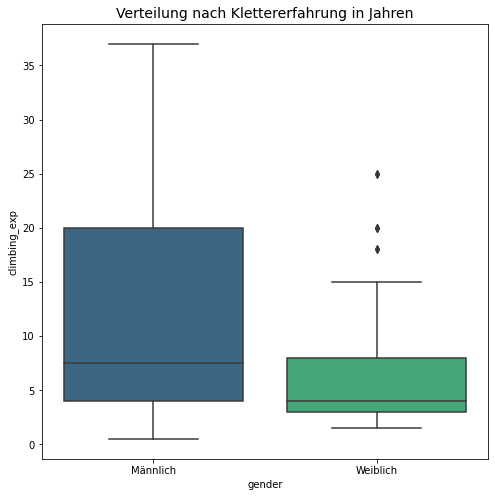

In [184]:
plt.figure(figsize=(8, 8))
sns.boxplot(x='gender', y='climbing_exp',data=df_survey, palette='viridis')
plt.title("Verteilung nach Klettererfahrung in Jahren", fontsize=14)
plt.show()

## Erkenntnisse durch Fußdaten

Die Fußeigenschaften der Befragten sollen wertvolle Erkenntnisse zur Passform der Kletterschuhe liefern. Daher beruht ein großer Teil der Umfrage auf Informationen rund um den Fuß. Folgende Informationen wurden gesammelt:
- Schuhgröße(Straßen- und Kletterschuhe)
- Fußfehlstellung
- Fußtypisierung
- Fußlänge
- Fußbreite

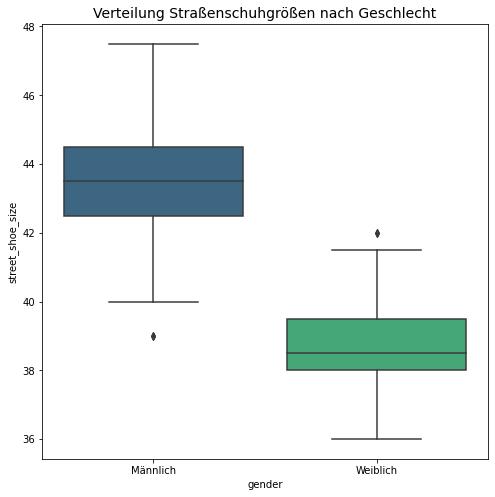

In [185]:
plt.figure(figsize=(8, 8))
sns.boxplot(x='gender', y='street_shoe_size', data=df_survey, palette='viridis')
plt.title("Verteilung Straßenschuhgrößen nach Geschlecht", fontsize=14)
plt.show()

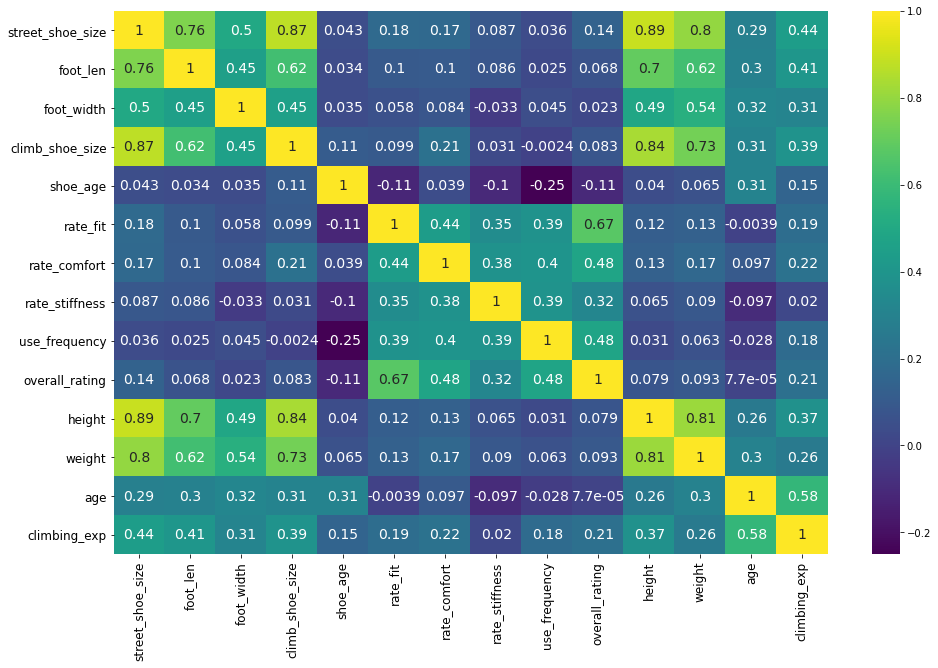

In [191]:
#df_survey.corrwith(df_survey['climb_shoe_size']).sort_values(ascending=False)[1:]
plt.figure(figsize=(16,10))
sns.heatmap(df_survey.corr(), cmap='viridis', annot=True,  annot_kws={"fontsize":14})
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

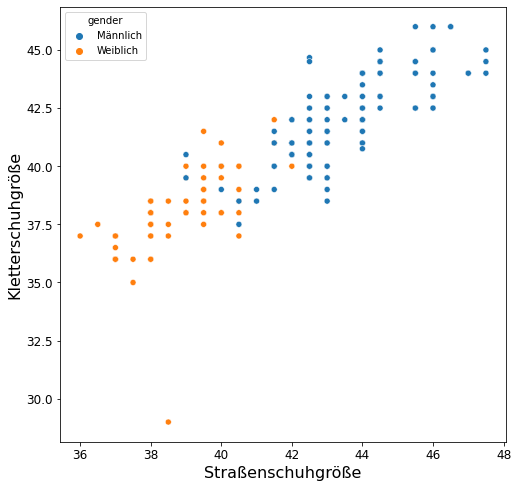

In [195]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='street_shoe_size', y='climb_shoe_size', data=df_survey, hue='gender')
plt.xlabel("Straßenschuhgröße", fontsize=16)
plt.ylabel("Kletterschuhgröße", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.legend( loc = 2, bbox_to_anchor = (1,1))
plt.show()

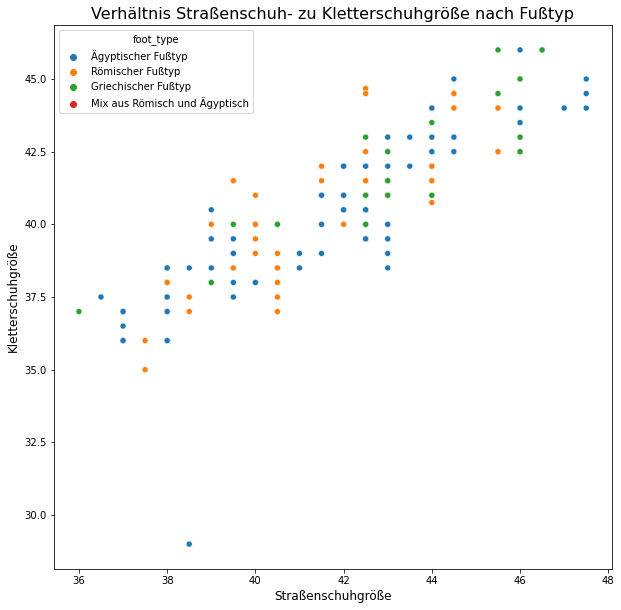

In [143]:
plt.figure(figsize=(10, 10))
plt.title('Verhältnis Straßenschuh- zu Kletterschuhgröße nach Fußtyp', fontsize=16)
sns.scatterplot(x='street_shoe_size', y='climb_shoe_size', data=df_survey, hue='foot_type')
plt.xlabel("Straßenschuhgröße", fontsize=12)
plt.ylabel("Kletterschuhgröße", fontsize=12)
plt.show()

In [144]:
foot_types = df_survey['foot_type'].unique()

brand_per_foottype = pd.DataFrame(columns=['foot_type', 'brand', 'count'])

for t in foot_types:
    new_row = {'foot_type' : t, 'brand' : df_survey['shoe_brand'][df_survey['foot_type'] == t].value_counts().keys()[0], 'count' : df_survey['shoe_brand'][df_survey['foot_type'] == t].value_counts()[0]}
    brand_per_foottype = brand_per_foottype.append(new_row, ignore_index=True)

sort = brand_per_foottype.sort_values(by='count', ascending=False)
sort

,foot_type,brand,count
0,Ägyptischer Fußtyp,La Sportiva,40
1,Römischer Fußtyp,La Sportiva,17
2,Griechischer Fußtyp,La Sportiva,16
3,Mix aus Römisch und Ägyptisch,Scarpa,1


In [145]:
df_survey.groupby(['foot_type', 'shoe_model']).count().sort_values(by='timestamp', ascending=False)

timestamp  street_shoe_size  \
foot_type           shoe_model                                                  
Römischer Fußtyp    Sonstige                              8                 8   
Ägyptischer Fußtyp  Sonstige                              7                 7   
                    La Sportiva - SKWAMA                  6                 6   
Griechischer Fußtyp La Sportiva - SKWAMA                  6                 6   
Ägyptischer Fußtyp  La Sportiva - SOLUTION                5                 5   
...                                                     ...               ...   
Römischer Fußtyp    Lowa - ROCKET                         1                 1   
                    Lowa - FALCO VCR                      1                 1   
                    La Sportiva - TC PRO                  1                 1   
                    La Sportiva - SOLUTION WOMAN          1                 1   
Ägyptischer Fußtyp  Tenaya - IATI                         1                 1   

                                                  fav_sneaker_model  foot_len  \
foot_type           shoe_model                                                  
Römischer Fußtyp    Sonstige                                      8         8   
Ägyptischer Fußtyp  Sonstige                                      7         7   
                    La Sportiva - SKWAMA                          4         6   
Griechischer Fußtyp La Sportiva - SKWAMA                          6         6   
Ägyptischer Fußtyp  La Sportiva - SOLUTION                        2         5   
...                                                             ...       ...   
Römischer Fußtyp    Lowa - ROCKET                                 1         1   
                    Lowa - FALCO VCR                              1         1   
                    La Sportiva - TC PRO                          0         1   
                    La Sportiva - SOLUTION WOMAN                  1         1   
Ägyptischer Fußtyp  Tenaya - IATI                                 1         1   

                                                  foot_width  foot_deform  \
foot_type           shoe_model                                              
Römischer Fußtyp    Sonstige                               8            8   
Ägyptischer Fußtyp  Sonstige                               7            7   
                    La Sportiva - SKWAMA                   6            6   
Griechischer Fußtyp La Sportiva - SKWAMA                   6            6   
Ägyptischer Fußtyp  La Sportiva - SOLUTION                 5            5   
...                                                      ...          ...   
Römischer Fußtyp    Lowa - ROCKET                          1            1   
                    Lowa - FALCO VCR                       1            1   
                    La Sportiva - TC PRO                   1            1   
                    La Sportiva - SOLUTION WOMAN           1            1   
Ägyptischer Fußtyp  Tenaya - IATI                          1            1   

                                                  shoe_brand  \
foot_type           shoe_model                                 
Römischer Fußtyp    Sonstige                               8   
Ägyptischer Fußtyp  Sonstige                               7   
                    La Sportiva - SKWAMA                   6   
Griechischer Fußtyp La Sportiva - SKWAMA                   6   
Ägyptischer Fußtyp  La Sportiva - SOLUTION                 5   
...                                                      ...   
Römischer Fußtyp    Lowa - ROCKET                          1   
                    Lowa - FALCO VCR                       1   
                    La Sportiva - TC PRO                   1   
                    La Sportiva - SOLUTION WOMAN           1   
Ägyptischer Fußtyp  Tenaya - IATI                          1   

                                                  shoe_model_manual  \
foot_type           shoe_model      

In [146]:
df_survey['foot_deform'].value_counts()

Nein                                                        92
Hallux Valgus                                               13
Senkfuß                                                     12
Spreizfuß                                                   11
Plattfuß                                                     5
Nein, Spreizfuß                                              5
Knickfuß                                                     4
Hallux Valgus, Senkfuß                                       4
Nein, Knickfuß                                               4
Hallux Valgus, Plattfuß                                      4
Plattfuß, Spreizfuß                                          3
Senkfuß, Spreizfuß                                           3
Plattfuß, Senkfuß                                            2
Hohlfuß                                                      2
Hallux Valgus, Plattfuß, Senkfuß, Spreizfuß                  2
Nein, abgeflachtes Quergewölbe, aber noch kein Spreizfu

In [147]:
for i in df_survey[df_survey['foot_deform'] == 'Nein, abgeflachtes Quergewölbe, aber noch kein Spreizfuß'].index:
    df_survey.drop(index=i, inplace=True, axis=0)
    
    
for i in df_survey[df_survey['foot_deform'] == 'Nein, Spreizfuß'].index:
    df_survey.at[i, 'foot_deform'] = 'Spreizfuß'
for i in df_survey[df_survey['foot_deform'] == 'Nein, Knickfuß'].index:
    df_survey.at[i, 'foot_deform'] = 'Knickfuß'
for i in df_survey[df_survey['foot_deform'] == 'Nein, Senkfuß, Spreizfuß'].index:
    df_survey.at[i, 'foot_deform'] = 'Senkfuß, Spreizfuß'
for i in df_survey[df_survey['foot_deform'] == 'Nein, Hallux Valgus, Senkfuß'].index:
    df_survey.at[i, 'foot_deform'] = 'Hallux Valgus, Senkfuß'
for i in df_survey[df_survey['foot_deform'] == 'Nein, Hallux Valgus'].index:
    df_survey.at[i, 'foot_deform'] = 'Hallux Valgus'
for i in df_survey[df_survey['foot_deform'] == 'Nein, Senkfuß'].index:
    df_survey.at[i, 'foot_deform'] = 'Senkfuß'
for i in df_survey[df_survey['foot_deform'] == 'Nein, Senkfuß, Spreizfuß'].index:
    df_survey.at[i, 'foot_deform'] = 'Senkfuß, Spreizfuß'

for i in df_survey[df_survey['foot_deform'] == 'Nein, Plattfuß'].index:
    df_survey.at[i, 'foot_deform'] = 'Plattfuß'

In [148]:
df_survey['foot_deform'].value_counts()

Nein                                           92
Spreizfuß                                      16
Hallux Valgus                                  15
Senkfuß                                        13
Knickfuß                                        8
Hallux Valgus, Senkfuß                          6
Plattfuß                                        6
Senkfuß, Spreizfuß                              4
Hallux Valgus, Plattfuß                         4
Plattfuß, Spreizfuß                             3
Hallux Valgus, Hohlfuß                          2
Plattfuß, Knickfuß                              2
Hallux Valgus, Spreizfuß                        2
Hohlfuß                                         2
Hallux Valgus, Plattfuß, Senkfuß, Spreizfuß     2
Plattfuß, Senkfuß                               2
Fersenbein                                      2
Name: foot_deform, dtype: int64

{'Hallux Valgus': 31, 'Senkfuß': 17, 'Spreizfuß': 16, 'Plattfuß': 13, 'Hohlfuß': 2, 'Knickfuß': 8}


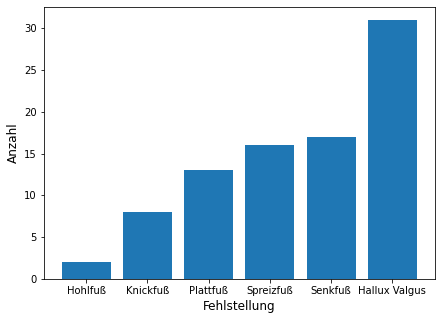

In [149]:
deformations = ['Hallux Valgus', 'Senkfuß','Spreizfuß','Plattfuß', 'Hohlfuß','Knickfuß']
stats = {}

for deform in deformations:
    df_survey[deform.lower().split()[0]] = df_survey.apply(lambda row: 1 if deform.strip() in row.foot_deform.split(',') else 0, axis=1)
    stats.update({deform : df_survey[deform.lower().split()[0]].value_counts()[1]})
print(stats) 

stats_sorted = dict(sorted(stats.items(),key= lambda x:x[1]))

plt.figure(figsize=(7, 5))
myList = stats_sorted.items()
x, y = zip(*myList) 


#sns.countplot(x=x)
#plt.title("Auftreten von Fehlstellungen des Fußes", fontsize=16)
plt.xlabel("Fehlstellung", fontsize=12)
plt.ylabel("Anzahl", fontsize=12)
plt.bar(x, y)
plt.show()



#fig, axs = plt.subplots(2, 3, figsize=(14, 8))
#fig.suptitle('Übersicht Anteile mit Fuß-Fehlstellungen', fontsize=14)
#sns.countplot(x='hallux',data=df_survey,palette='viridis', ax=axs[0,0])
#sns.countplot(x='senkfuß',data=df_survey,palette='viridis',ax=axs[0,1])
#sns.countplot(x='spreizfuß',data=df_survey,palette='viridis',ax=axs[0,2])
#sns.countplot(x='plattfuß',data=df_survey,palette='viridis',ax=axs[1,0])
#sns.countplot(x='hohlfuß',data=df_survey,palette='viridis',ax=axs[1,1])
#sns.countplot(x='knickfuß',data=df_survey,palette='viridis',ax=axs[1,2])

#plt.show()

In [150]:
df_survey.groupby(['gender', 'hallux'])['timestamp'].count()

gender    hallux
Männlich  0         106
          1          16
Weiblich  0          44
          1          15
Name: timestamp, dtype: int64

In [151]:
df_survey.groupby(['gender', 'senkfuß'])['timestamp'].count()

gender    senkfuß
Männlich  0          112
          1           10
Weiblich  0           52
          1            7
Name: timestamp, dtype: int64

In [152]:
df_survey.groupby(['gender', 'plattfuß'])['timestamp'].count()

gender    plattfuß
Männlich  0           110
          1            12
Weiblich  0            58
          1             1
Name: timestamp, dtype: int64

In [153]:
df_survey.groupby(['gender', 'spreizfuß'])['timestamp'].count()

gender    spreizfuß
Männlich  0            110
          1             12
Weiblich  0             55
          1              4
Name: timestamp, dtype: int64

In [154]:
df_survey.groupby(['gender', 'hohlfuß'])['timestamp'].count()

gender    hohlfuß
Männlich  0          120
          1            2
Weiblich  0           59
Name: timestamp, dtype: int64

In [155]:
df_survey.groupby(['gender', 'knickfuß'])['timestamp'].count()

gender    knickfuß
Männlich  0           115
          1             7
Weiblich  0            58
          1             1
Name: timestamp, dtype: int64

In [156]:
brand_per_deform = pd.DataFrame(columns=['deform', 'brand', 'count'])

for deform in deformations:
    new_row = {'deform' : deform, 'brand' : df_survey['shoe_brand'][df_survey[deform.lower().split()[0]] == 1].value_counts().keys()[0], 'count' : df_survey['shoe_brand'][df_survey[deform.lower().split()[0]] == 1].value_counts()[0]}
    brand_per_deform = brand_per_deform.append(new_row, ignore_index=True)

sort = brand_per_deform.sort_values(by='count', ascending=False)
sort

,deform,brand,count
0,Hallux Valgus,La Sportiva,15
1,Senkfuß,La Sportiva,7
2,Spreizfuß,Scarpa,6
3,Plattfuß,Scarpa,5
5,Knickfuß,Evolv,5
4,Hohlfuß,Scarpa,2


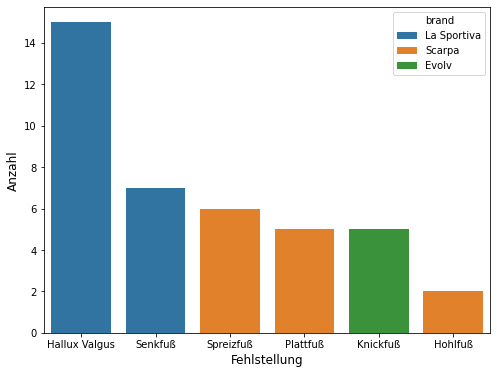

In [157]:
plt.figure(figsize=(8, 6))
#plt.title('Meist genutzte Marke nach Fehlstellung', fontsize=16)
sns.barplot(x='deform', y='count', data=sort, hue='brand', dodge=False)
plt.xlabel("Fehlstellung", fontsize=12)
plt.ylabel("Anzahl", fontsize=12)
plt.show()

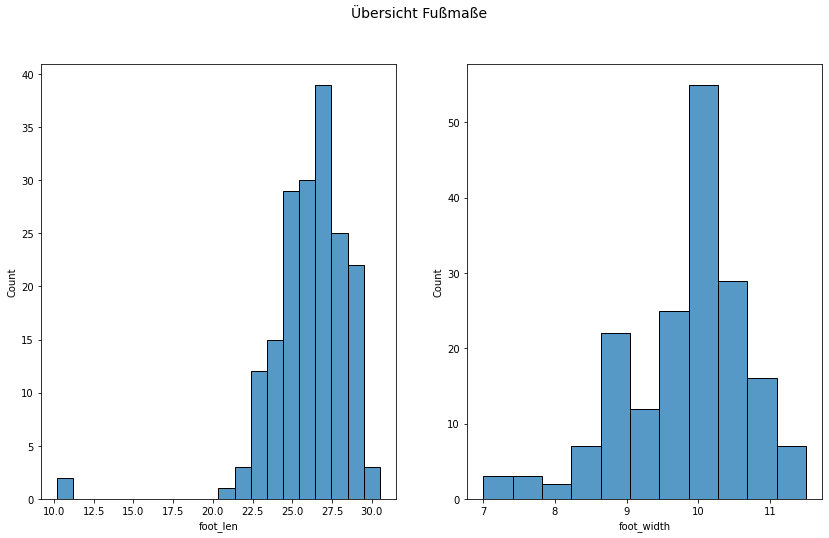

In [158]:
fig, axs = plt.subplots(1, 2, figsize=(14, 8))
fig.suptitle('Übersicht Fußmaße', fontsize=14)
sns.histplot(x='foot_len',data=df_survey,palette='viridis', ax=axs[0])
sns.histplot(x='foot_width',data=df_survey,palette='viridis',ax=axs[1])
plt.show()

In [159]:
df_survey['foot_type'].value_counts()

Ägyptischer Fußtyp               91
Römischer Fußtyp                 50
Griechischer Fußtyp              38
Mix aus Römisch und Ägyptisch     2
Name: foot_type, dtype: int64

In [160]:
df_survey['foot_type'] = df_survey.apply(lambda row: 'Ägyptischer Fußtyp' if row.foot_type == 'Mix aus Römisch und Ägyptisch' else row.foot_type, axis=1)
df_survey['foot_type'].value_counts()

Ägyptischer Fußtyp     93
Römischer Fußtyp       50
Griechischer Fußtyp    38
Name: foot_type, dtype: int64

In [161]:
foot_fam = ['Ägyptischer Fußtyp', 'Römischer Fußtyp','Griechischer Fußtyp']

for foot in foot_fam:
    df_survey[foot.lower().split()[0]] = df_survey.apply(lambda row: 1 if foot in row.foot_type.split(',') else 0, axis=1)

In [162]:
df_survey['gender'][df_survey['foot_type'] == 'Römischer Fußtyp'].value_counts()

Männlich    32
Weiblich    18
Name: gender, dtype: int64

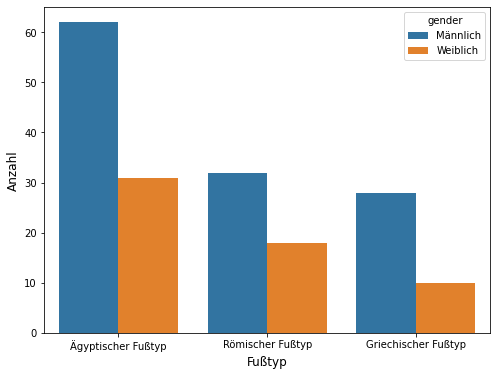

In [163]:
plt.figure(figsize=(8, 6))
sns.countplot(x='foot_type', data=df_survey, hue='gender')
plt.xlabel("Fußtyp", fontsize=12)
plt.ylabel("Anzahl", fontsize=12)
plt.show()

Die ägyptische Fußform ist für beide Geschlechter mit Abstand am meisten vertreten, anschließend folgt der römische und der griechische Fußtyp. Letzterer kommt bei Männern auffallend häufiger vor als bei Frauen. Die Erwartung ist, dass insbesondere der Fußtyp die Kletterschuhgröße signifikant beeinflußt. Daher ist eine Korellationsbetrachtung dieses Merkmals besonders interessant.

Bei der Betrachtung von Korellationen mit der Kletterschuhgröße scheinen insbesondere Straßenschuhgröße, Körpergröße und Gewicht eine besondere Rolle zu spielen. Weitere relevante Merkmale sind das Fußmaß, gemessen in Länge und Breite. Überraschend ist eine relativ hohe Korellation mit der Klettererfahrung. Der griechische Fußtyp trat in der Umfrage weitaus seltener auf als der äyptische, dennoch besitzt er eine signifikant höhere Korellation mit der Schuhgröße als die beiden anderen Fußtypen. Eine Erklärung könnte der deutlich längere Mittelzehknochen dieser Fußfamilie liefern. Dieser übertrifft die Länge aller restlichen Zehen, wodurch die betroffenen Personen meistens zu einer größeren Schuhnummer greifen müssen. 

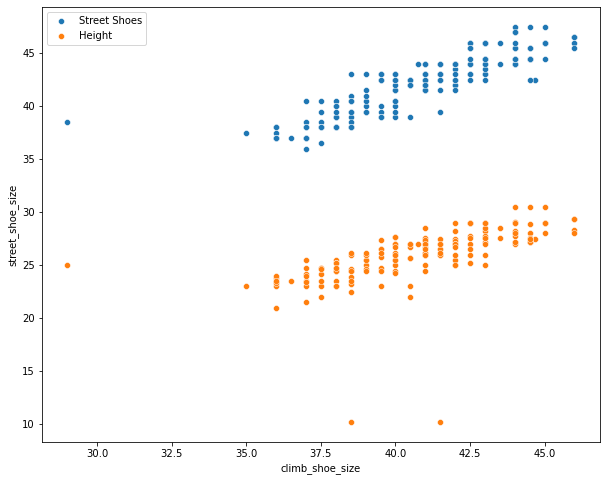

In [79]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='climb_shoe_size', y='street_shoe_size', data=df_survey, palette='viridis')
#sns.scatterplot(x='climb_shoe_size', y='height', data=df_survey, palette='viridis')
#sns.scatterplot(x='climb_shoe_size', y='weight', data=df_survey, palette='viridis')
sns.scatterplot(x='climb_shoe_size', y='foot_len', data=df_survey, palette='viridis')
#sns.scatterplot(x='climb_shoe_size', y='foot_width', data=df_survey, palette='viridis')
plt.legend(['Street Shoes', 'Height','Weight','Foot Length','Foot Width'])
plt.show()

In [80]:
df_survey['climb_style'].value_counts()

Sportklettern, Bouldern                    78
Bouldern                                   54
Sportklettern, Bouldern, Mehrseillängen    21
Sportklettern                              12
Sportklettern, Mehrseillängen              10
Mehrseillängen                              4
Bouldern, Mehrseillängen                    2
Name: climb_style, dtype: int64

Die grafische Darstellung der oben genannten, wichtigsten Merkmale deutet auf eine lineare Beziehung hin. Diese Eigenschaft kann bei der späteren vorhersage der Schuhgröße von Vorteil sein, beispielweise durch die klassiche lineare Regression.

## Analyse der Kletterschuhe

### Schumarken

In [81]:
df_survey['shoe_brand'].nunique()

15

In [82]:
df_survey['shoe_brand'].value_counts()[:5]

La Sportiva    74
Scarpa         45
Ocun           17
Red Chili      11
Evolv           7
Name: shoe_brand, dtype: int64

In der Betrachtung der 10 am häufigsten vorkommenden Marken innerhalb der Umfrage ist La Sportiva mit 74 Schuhen rund 40\% öfter vertreten als Scarpa mit 45 Schuhen. Ocun ist mit 17 Vorkommnissen auf Platz 3.

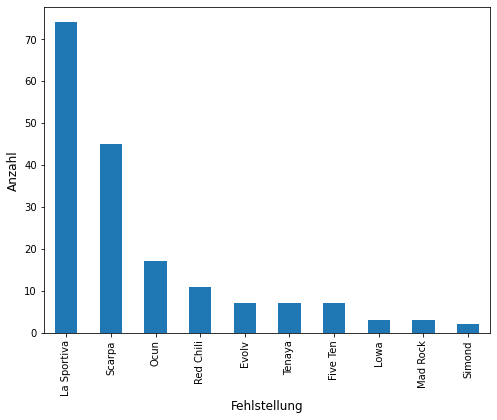

In [83]:
most_common_brands = df_survey['shoe_brand'].value_counts()[:10]
plt.figure(figsize=(8, 6))
most_common_brands.plot.bar()
plt.xlabel("Fehlstellung", fontsize=12)
plt.ylabel("Anzahl", fontsize=12)
plt.show()

### Schuhmodelle

In [84]:
df_survey['shoe_model'].nunique()

71

In [85]:
df_survey['shoe_model'].value_counts()[:25]

Sonstige                        15
La Sportiva - SKWAMA            13
Scarpa - VAPOR V                 9
Ocun - OZONE QC                  7
La Sportiva - OTAKI              7
La Sportiva - MYTHOS             7
Red Chili - SPIRIT VCR           6
Scarpa - DRAGO                   5
La Sportiva - SOLUTION           5
Five Ten - HIANGLE               5
La Sportiva - SOLUTION WOMAN     4
La Sportiva - THEORY             4
Scarpa - INSTINCT VS             4
Scarpa - INSTINCT VS WMN         4
Scarpa - INSTINCT VSR            4
La Sportiva - KATANA WOMAN       4
La Sportiva - MYTHOS ECO         3
Scarpa - VAPOR V WMN             3
La Sportiva - MIURA              3
Scarpa - VAPOR                   3
La Sportiva - SOLUTION COMP      3
Tenaya - OASI                    3
La Sportiva - PYTHON             2
La Sportiva - MIURA VS WOMAN     2
Scarpa - FURIA S                 2
Name: shoe_model, dtype: int64

Der beliebteste Kletterschuh war der La Sportiva - SKWAMA mit 13 Vorkommnissen innerhalb der Umfrage, gefolgt vom Vapor V der Marke Scarpa mit 9. 16 Personen gaben \enquote{Sonstige} an, was auf fehlende Modelle innerhalb der festgelegten Auswahlliste hindeutet. Da sich dieses Ergebnis bereits früher abzeichnete, wurde ein optionales Freitext-Feld \enquote{Modell nicht in der Liste?} hinterlegt, um den Befragten die Möglichkeit zu geben trotzdem ihr Modell eintragen zu können. Hierdurch wird klarer, welche Modelle sonst noch verwendet werden, die bei der Vorbereitung des Fragebogens und der Marktrecherche nicht im Fokus standen.

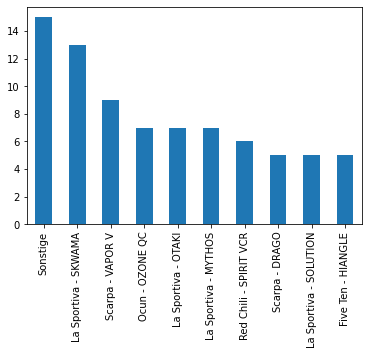

In [86]:
most_common_models = df_survey['shoe_model'].value_counts()[:10]
most_common_models.plot.bar()
plt.show()

In [87]:
df_survey[['shoe_brand', 'shoe_model', 'shoe_model_manual']][df_survey['shoe_model'] == 'Sonstige']

,shoe_brand,shoe_model,shoe_model_manual
18,Bouldrini,Sonstige,NaN
27,Mad Rock,Sonstige,NaN
31,Evolv,Sonstige,NaN
54,Scarpa,Sonstige,NaN
55,?,Sonstige,NaN
77,Boreal,Sonstige,Satori
86,Evolv,Sonstige,Evolve Shaman 2
88,Evolv,Sonstige,Evolve Shaman 2
103,La Sportiva,Sonstige,Millet Easy up
113,Scarpa,Sonstige,NaN


Neben Einzelfällen wie dem Modell Satori der Marke Boreal oder AMP von Red Chili ist das Modell Shaman 2 von Evolv vier Mal aufgetreten. Das könnte darauf zurückzuführen sein, dass der Schuh in der Vergangenheit weit verbreitet war und der Hersteller ihn nicht mehr im Produktportfolio führt. Es scheint sich dennoch um einen Favoriten zu handeln, weshalb dieses Modell das Merkmal \enquote{Sonstige} ersetzen wird, um diese Klasse bei der späteren Modellvorhersage nutzen zu können. Es werden ebenfalls alle manuell eingegebenen Modelle übernommen, um die Informationen später nutzen zu können. Auch wenn diese Modelle nur selten vorkommen, ist dies potentiell eine besserer Vorschlag als nur \enquote{Sonstige} zu empfehlen.

In [88]:
#df_survey[pd.notnull(df_survey['shoe_model_manual'])]
df_survey[df_survey['shoe_model'] == 'Sonstige']

,timestamp,street_shoe_size,fav_sneaker_model,foot_len,foot_width,foot_type,foot_deform,shoe_brand,shoe_model,shoe_model_manual,...,climbing_exp,hallux,senkfuß,spreizfuß,plattfuß,hohlfuß,knickfuß,ägyptischer,römischer,griechischer
18,25.02.2021 22:43:41,39.0,Vans,24.5,9.0,Ägyptischer Fußtyp,Nein,Bouldrini,Sonstige,NaN,...,8.0,0,0,0,0,0,0,1,0,0
27,26.02.2021 10:07:54,39.5,Five ten freerider,24.7,10.0,Ägyptischer Fußtyp,Nein,Mad Rock,Sonstige,NaN,...,20.0,0,0,0,0,0,0,1,0,0
31,26.02.2021 13:35:30,39.0,vans Sk8 High,23.0,9.5,Ägyptischer Fußtyp,Nein,Evolv,Sonstige,NaN,...,3.0,0,0,0,0,0,0,1,0,0
54,01.03.2021 08:33:32,44.0,Vans,27.0,10.0,Ägyptischer Fußtyp,Spreizfuß,Scarpa,Sonstige,NaN,...,2.0,0,0,1,0,0,0,1,0,0
55,01.03.2021 08:37:31,40.5,Addidas,24.6,8.8,Römischer Fußtyp,Spreizfuß,?,Sonstige,NaN,...,2.0,0,0,1,0,0,0,0,1,0
77,03.03.2021 22:00:12,44.5,Vans,27.6,10.5,Ägyptischer Fußtyp,Senkfuß,Boreal,Sonstige,Satori,...,3.0,0,1,0,0,0,0,1,0,0
86,08.03.2021 20:17:05,44.5,Brooks Defyance 11,27.2,10.1,Römischer Fußtyp,Knickfuß,Evolv,Sonstige,Evolve Shaman 2,...,37.0,0,0,0,0,0,1,0,1,0
88,09.03.2021 09:23:31,44.5,Brooks Defyance 11,27.2,10.1,Römischer Fußtyp,Knickfuß,Evolv,Sonstige,Evolve Shaman 2,...,37.0,0,0,0,0,0,1,0,1,0
103,23.03.2021 19:33:48,41.5,Chucks,26.2,8.8,Ägyptischer Fußtyp,Nein,La Sportiva,Sonstige,Millet Easy up,...,3.0,0,0,0,0,0,0,1,0,0
113,25.02.2021 18:57:55,41.0,Halbschuhe von Hilfiger oder BoxFresh,26.0,10.5,Ägyptischer Fußtyp,Nein,Scarpa,Sonstige,NaN,...,11.0,0,0,0,0,0,0,1,0,0


In [89]:
df_survey.drop(index=55,inplace=True)

#df_survey.at[61,'shoe_model'] = 'Five Ten - DIAMOND'
df_survey.at[77,'shoe_model'] = 'Boreal - SATORI'

df_survey.at[31,'shoe_model'] = 'Evolv - SHAMAN 2'
df_survey.at[86,'shoe_model'] = 'Evolv - SHAMAN 2'
df_survey.at[88,'shoe_model'] = 'Evolv - SHAMAN 2'
df_survey.at[103,'shoe_model'] = 'La Sportiva - MILLET EASY UP'
df_survey.at[140,'shoe_model'] = 'Red Chili - AMP'
df_survey.at[154,'shoe_model'] = 'Evolv - SHAMAN 2'
df_survey.at[155,'shoe_model'] = 'Evolv - SHAMAN 2'

df_survey[['shoe_brand','shoe_model']][df_survey['shoe_model']  == 'Sonstige']

,shoe_brand,shoe_model
18,Bouldrini,Sonstige
27,Mad Rock,Sonstige
54,Scarpa,Sonstige
113,Scarpa,Sonstige
129,Red Chili,Sonstige
134,La Sportiva,Sonstige


Nach der Übernahme bleiben noch die Beobachtungen übrig ohne weitere Informationen. Die Daten zur Person sind trotzdem wertvoll, insbesondere da es sich nur um eine kleine Stichprobenmenge handelt. Deshalb sollte keine Beobachtung ohne Weiteres gelöscht werden. Ein Lösungsansatz ist das Imputation Verfahren, welches zur Bereinigung fehlender Werte genutzt wird. Bei numerischen Werten kann beispielsweise der allgemeine Durchschnitt der Spalte berechnet werden, welcher dann in alle Beobachtungen mit fehlendem Wert eingetragen wird. So könnte in diesem Fall der am häufigsten vorkommende Schuh jeder Marke ermittelt werden, welcher dann jeweils die Ausprägung \enquote{Sonstige} ersetzt.

In [90]:
# Ermittle das häufigste Schuhmodell einer Marke
most_common_models = {}
    
for i in df_survey.groupby(['shoe_brand', 'shoe_model'])['shoe_model'].count().sort_values().groupby(level=0).tail(1).index:
    most_common_models.update({i[0]:i[1]})
    
most_common_models

{'Black Diamond': 'Black Diamond - ASPECT',
 'Simond': 'Simond - ROCK+',
 'So iLL': 'So iLL - ZERO PRO',
 'Boreal': 'Boreal - SATORI',
 'Bouldrini': 'Sonstige',
 'Lowa': 'Lowa - FALCO VCR',
 'Mad Rock': 'Mad Rock - SHARK 2.0',
 'Tenaya': 'Tenaya - OASI',
 'Five Ten': 'Five Ten - HIANGLE',
 'Evolv': 'Evolv - SHAMAN 2',
 'Red Chili': 'Red Chili - SPIRIT VCR',
 'Ocun': 'Ocun - OZONE QC',
 'Scarpa': 'Scarpa - VAPOR V',
 'La Sportiva': 'La Sportiva - SKWAMA'}

In [91]:
for i in df_survey['shoe_brand'][df_survey['shoe_model'] == 'Sonstige'].index:
    df_survey.at[i,'shoe_model'] = most_common_models[df_survey['shoe_brand'].iloc[i]]
df_survey[['shoe_brand','shoe_model']][df_survey['shoe_model']  == 'Sonstige']

,shoe_brand,shoe_model
18,Bouldrini,Sonstige


Nachdem nun alle möglichen Substitutionen vorgenommen wurden, bleibt nur noch eine  Beobachtung übrig der Marke Bouldrini, welche gar keine Alternative zulässt.
Für den Fall, dass die Marke für einen speziellen Fußtyp relevant sein könnte, wird in diesem Fall nur die Schuhmarke vorgeschlagen.

In [92]:
df_survey.at[18,'shoe_model'] = df_survey.at[18,'shoe_brand']
df_survey[['shoe_brand','shoe_model']][df_survey['shoe_model']  == 'Sonstige']

,shoe_brand,shoe_model


In [93]:
df_survey['shoe_model'].value_counts()[:25]

La Sportiva - SKWAMA            14
Scarpa - VAPOR V                11
Ocun - OZONE QC                  7
La Sportiva - MYTHOS             7
La Sportiva - OTAKI              7
Red Chili - SPIRIT VCR           6
Scarpa - DRAGO                   5
Evolv - SHAMAN 2                 5
La Sportiva - SOLUTION           5
Five Ten - HIANGLE               5
Scarpa - INSTINCT VS WMN         4
Scarpa - INSTINCT VS             4
La Sportiva - THEORY             4
La Sportiva - SOLUTION WOMAN     4
La Sportiva - KATANA WOMAN       4
Tenaya - OASI                    4
Scarpa - INSTINCT VSR            4
Scarpa - VAPOR V WMN             3
Mad Rock - SHARK 2.0             3
Scarpa - VAPOR                   3
La Sportiva - MIURA              3
La Sportiva - SOLUTION COMP      3
La Sportiva - MYTHOS ECO         3
Scarpa - FURIA S                 2
La Sportiva - MIURA VS WOMAN     2
Name: shoe_model, dtype: int64

Alle Beobachtungen mit dem Schuhmodell \enquote{Sonstige} konnten behandelt werden. Eine Klassifikation mit dem Modell als Zielvariable wird nun im Idealfall immer einen Schuh vorhersagen können. Als nächstes ist die Betrachtung der Schuhgröße relevant, um daraus die optimale Größe ableiten zu können. Hierfür wird zunächst die globale Statistik des Datensatzes betrachtet für Straßenschuhe sowie Kletterschuhe.

### Schuhmodell - Fußtyp

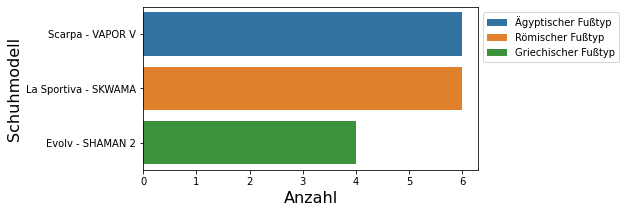

In [94]:
#df_survey.groupby(['foot_type', 'shoe_model'])['timestamp'].count().sort_values(ascending=False)

df_foots = pd.DataFrame()
df_foots['foot_type'] = foot_fam
df_foots['shoe_model'] = ['Scarpa - VAPOR V', 'La Sportiva - SKWAMA', 'Evolv - SHAMAN 2']
df_foots['counts'] = [6, 6, 4]
plt.figure(figsize=(6, 3))
sns.barplot(x='counts' ,y='shoe_model', data=df_foots, hue='foot_type', dodge=False, orient='h')
plt.xlabel("Anzahl", fontsize=16)
plt.ylabel("Schuhmodell", fontsize=16)
plt.legend( loc = 2, bbox_to_anchor = (1,1))
plt.show()

In [95]:
df_survey[pd.isnull(df_survey['climb_style'])]

,timestamp,street_shoe_size,fav_sneaker_model,foot_len,foot_width,foot_type,foot_deform,shoe_brand,shoe_model,shoe_model_manual,...,climbing_exp,hallux,senkfuß,spreizfuß,plattfuß,hohlfuß,knickfuß,ägyptischer,römischer,griechischer


In [96]:
df_survey['closure_type'].value_counts()

Klett       134
Schnürer     38
Slipper       8
Name: closure_type, dtype: int64

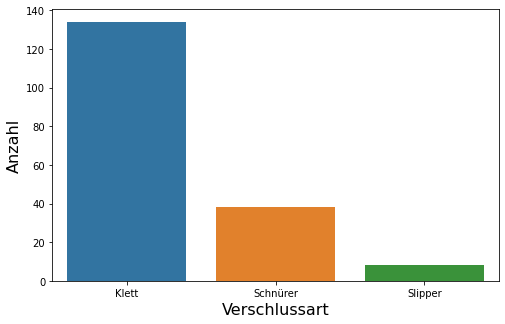

In [97]:
plt.figure(figsize=(8,5))
sns.countplot(x='closure_type', data=df_survey)
plt.ylabel('Anzahl', fontsize=16)
plt.xlabel('Verschlussart', fontsize=16)
plt.show()

In [98]:
def strip_list(liste):
    stripped = []
    
    for n in liste:
        stripped.append(n.strip())
    
    return stripped

styles = ['Sportklettern', 'Bouldern', 'Mehrseillängen']
for style in styles:
    df_survey[style.lower().split()[0]] = df_survey.apply(lambda row: 1 if style in strip_list(row.climb_style.split(',')) else 0, axis=1)

df_survey.groupby(['shoe_model', 'bouldern'])['timestamp'].count().sort_values(ascending=False)


shoe_model                  bouldern
La Sportiva - SKWAMA        1           14
Scarpa - VAPOR V            1            8
Ocun - OZONE QC             1            7
La Sportiva - MYTHOS        1            6
Evolv - SHAMAN 2            1            5
                                        ..
Lowa - FALCO VCR            0            1
La Sportiva - THEORY WOMAN  1            1
La Sportiva - TC PRO        0            1
La Sportiva - TARANTULACE   1            1
Black Diamond - ASPECT      1            1
Name: timestamp, Length: 85, dtype: int64

In [99]:
boulder_shoes = df_survey['shoe_model'][df_survey['bouldern'] == 1].unique()
climbing_shoes = df_survey['shoe_model'][df_survey['sportklettern'] == 1].unique()
mpitch_shoes = df_survey['shoe_model'][df_survey['mehrseillängen'] == 1].unique()

In [100]:
df_survey['terrain'].value_counts()

Beides     103
Halle       52
Outdoor     25
Name: terrain, dtype: int64

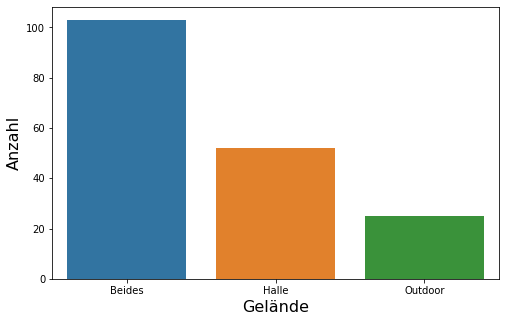

In [101]:
plt.figure(figsize=(8,5))
sns.countplot(x='terrain', data=df_survey)
plt.ylabel('Anzahl', fontsize=16)
plt.xlabel('Gelände', fontsize=16)
plt.show()

In [102]:
df_survey.groupby(['terrain','shoe_model'])['timestamp'].count().sort_values(ascending=False)['Outdoor'][:5]

shoe_model
La Sportiva - SOLUTION      3
La Sportiva - OTAKI         2
La Sportiva - MYTHOS        2
La Sportiva - MYTHOS ECO    2
La Sportiva - MIURA         2
Name: timestamp, dtype: int64

In [103]:
df_survey.groupby(['terrain','shoe_model'])['timestamp'].count().sort_values(ascending=False)['Halle'][:5]

shoe_model
Scarpa - VAPOR V               4
Evolv - SHAMAN 2               4
La Sportiva - SKWAMA           3
La Sportiva - KATANA WOMAN     2
La Sportiva - SOLUTION COMP    2
Name: timestamp, dtype: int64

In [104]:
df_survey.groupby(['terrain','shoe_model'])['timestamp'].count().sort_values(ascending=False)['Beides'][:5]

shoe_model
La Sportiva - SKWAMA      10
Scarpa - VAPOR V           7
Five Ten - HIANGLE         5
Ocun - OZONE QC            5
Red Chili - SPIRIT VCR     5
Name: timestamp, dtype: int64

In [105]:
df_survey['halle'] = df_survey['terrain'].map(lambda row: 1 if row in ['Halle', 'Beides'] else 0)
df_survey['outdoor'] = df_survey['terrain'].map(lambda row: 1 if row in ['Outdoor', 'Beides'] else 0)

In [106]:
round(df_survey[['shoe_age', 'use_frequency']].describe().transpose(),2)

,count,mean,std,min,25%,50%,75%,max
shoe_age,180.0,1.77,1.36,0.0,1.0,1.0,2.0,10.0
use_frequency,180.0,3.78,1.20,1.0,3.0,4.0,5.0,5.0


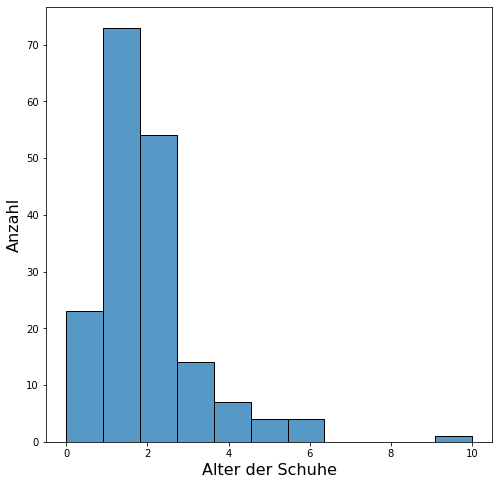

In [107]:
plt.figure(figsize=(8,8))
sns.histplot(x='shoe_age', data=df_survey, bins=11)
plt.ylabel('Anzahl', fontsize=16)
plt.xlabel('Alter der Schuhe', fontsize=16)
plt.show()

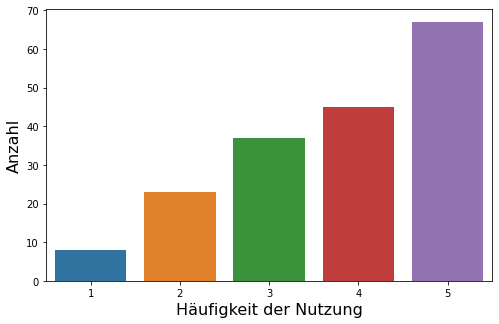

In [108]:
plt.figure(figsize=(8,5))
sns.countplot(x='use_frequency', data=df_survey)
plt.ylabel('Anzahl', fontsize=16)
plt.xlabel('Häufigkeit der Nutzung', fontsize=16)
plt.show()

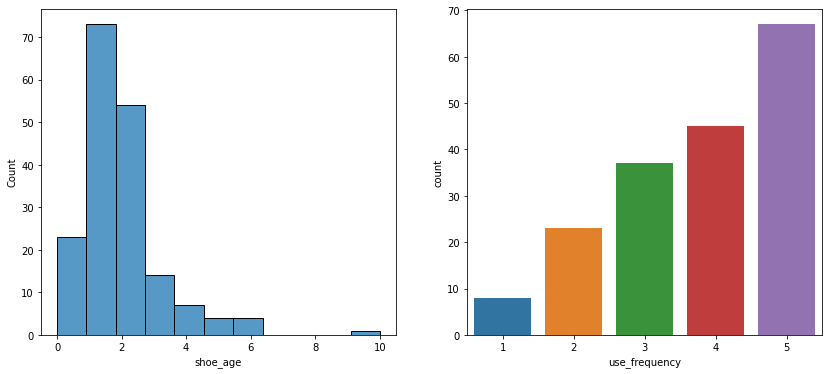

In [109]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(x='shoe_age', data=df_survey, bins=11, ax=axs[0])
sns.countplot(x='use_frequency',data=df_survey, ax=axs[1])

plt.show()

In [110]:
df_survey.columns

Index(['timestamp', 'street_shoe_size', 'fav_sneaker_model', 'foot_len',
       'foot_width', 'foot_type', 'foot_deform', 'shoe_brand', 'shoe_model',
       'shoe_model_manual', 'climb_shoe_size', 'shoe_age', 'favourite',
       'vorspann', 'downturn', 'asymetry', 'closure_type', 'climb_style',
       'terrain', 'rate_fit', 'rate_comfort', 'rate_stiffness',
       'use_frequency', 'climbed_grade', 'overall_rating', 'gender', 'height',
       'weight', 'age', 'climbing_exp', 'hallux', 'senkfuß', 'spreizfuß',
       'plattfuß', 'hohlfuß', 'knickfuß', 'ägyptischer', 'römischer',
       'griechischer', 'sportklettern', 'bouldern', 'mehrseillängen', 'halle',
       'outdoor'],
      dtype='object')

In [111]:
df_survey[['rate_fit', 'rate_comfort', 'rate_stiffness', 'overall_rating']].describe()

,rate_fit,rate_comfort,rate_stiffness,overall_rating
count,180.000000,180.000000,180.000000,180.000000
mean,4.227778,3.816667,3.611111,4.222222
std,0.768300,1.059540,1.064348,0.773554
min,2.000000,1.000000,1.000000,2.000000
25%,4.000000,3.000000,3.000000,4.000000
50%,4.000000,4.000000,4.000000,4.000000
75%,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000


In [112]:
df_survey[['street_shoe_size','climb_shoe_size']].describe()

,street_shoe_size,climb_shoe_size
count,180.000000,180.000000
mean,42.036111,40.796778
std,2.822511,2.750416
min,36.000000,29.000000
25%,39.500000,38.500000
50%,42.500000,41.000000
75%,44.000000,43.000000
max,47.500000,46.000000


Im gesamten Datensatz ist die durchschnittliche Größe von Straßenschuhen ca. 1,2 Nummern größer als die der Kletterschuh. Interessant wäre die Verteilung unter den Schuhmodellen zu betrachten.

In [113]:
df_mean = round(df_survey.groupby('shoe_model')[['street_shoe_size','climb_shoe_size', 'rate_fit', 'rate_comfort', 'rate_stiffness', 'overall_rating']].mean(),2)
df_count = df_survey.groupby('shoe_model')[['street_shoe_size','climb_shoe_size']].count()
df_merge = pd.merge(df_mean, df_count, on='shoe_model')
df_merge.reset_index(inplace=True)

df_mean_shoesize_per_model = pd.DataFrame()
df_mean_shoesize_per_model['shoe_model'] = df_merge['shoe_model']
df_mean_shoesize_per_model['rate_fit'] = df_merge['rate_fit']
df_mean_shoesize_per_model['rate_comfort']= df_merge['rate_comfort']
df_mean_shoesize_per_model['rate_stiffness']= df_merge['rate_stiffness']
df_mean_shoesize_per_model['overall_rating']= df_merge['overall_rating']
df_mean_shoesize_per_model['street_shoe_size'] = df_merge['street_shoe_size_x']
df_mean_shoesize_per_model['climb_shoe_size'] = df_merge['climb_shoe_size_x']
df_mean_shoesize_per_model['delta'] = df_merge['climb_shoe_size_x'] - df_merge['street_shoe_size_x']
df_mean_shoesize_per_model['count'] = df_merge['street_shoe_size_y']
df_mean_shoesize_per_model.head(3)

,shoe_model,rate_fit,rate_comfort,rate_stiffness,overall_rating,street_shoe_size,climb_shoe_size,delta,count
0,Black Diamond - ASPECT,5.0,4.0,2.0,4.0,39.0,40.0,1.0,1
1,Boreal - SATORI,5.0,5.0,4.0,4.0,44.5,44.5,0.0,1
2,Bouldrini,3.0,2.0,2.0,4.0,39.0,38.5,-0.5,1


In [114]:
df_top10_count = df_mean_shoesize_per_model.sort_values(by=['count'], ascending=False)[:10]
df_top10_count.reset_index(inplace=True)
df_top10_count

,index,shoe_model,rate_fit,rate_comfort,rate_stiffness,overall_rating,street_shoe_size,climb_shoe_size,delta,count
0,24,La Sportiva - SKWAMA,4.36,3.43,3.64,4.50,43.25,40.75,-2.50,14
1,64,Scarpa - VAPOR V,4.09,4.00,3.36,4.36,42.86,41.86,-1.00,11
2,44,Ocun - OZONE QC,3.29,3.14,2.86,3.29,43.79,43.50,-0.29,7
3,22,La Sportiva - OTAKI,4.00,3.14,2.71,3.86,43.64,41.86,-1.78,7
4,20,La Sportiva - MYTHOS,4.43,4.71,4.71,4.43,44.00,42.07,-1.93,7
5,51,Red Chili - SPIRIT VCR,4.00,3.67,3.83,4.50,44.17,43.00,-1.17,6
6,5,Evolv - SHAMAN 2,4.00,4.40,3.20,4.80,43.40,43.70,0.30,5
7,55,Scarpa - DRAGO,4.60,4.20,4.60,4.80,40.40,38.80,-1.60,5
8,8,Five Ten - HIANGLE,4.20,4.40,4.00,4.40,42.70,42.33,-0.37,5
9,25,La Sportiva - SOLUTION,4.60,3.80,3.60,4.20,42.40,40.10,-2.30,5


In [115]:
plt.figure(figsize=(16,10))

sns.barplot(x='shoe_model', y='count', data=df_top10)
plt.ylabel('Anzahl', fontsize=16)
plt.xlabel('Schuhmodelle', fontsize=16)
plt.xticks(rotation=90)
plt.show()

NameError: name 'df_top10' is not defined

<Figure size 1152x720 with 0 Axes>

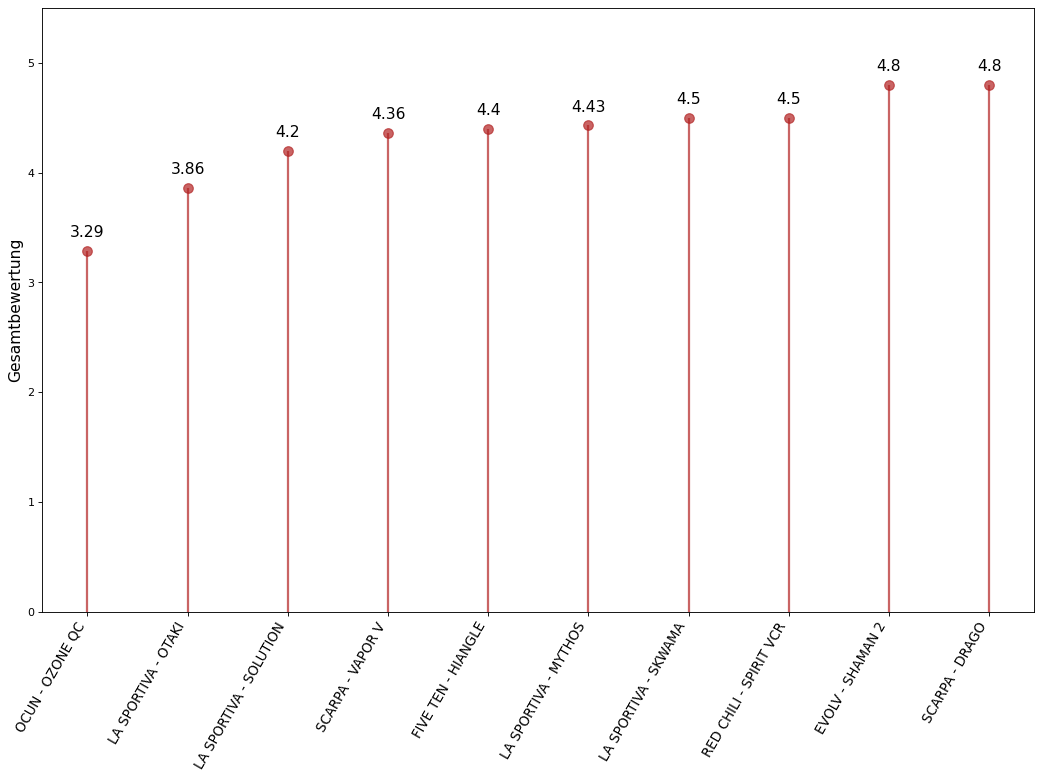

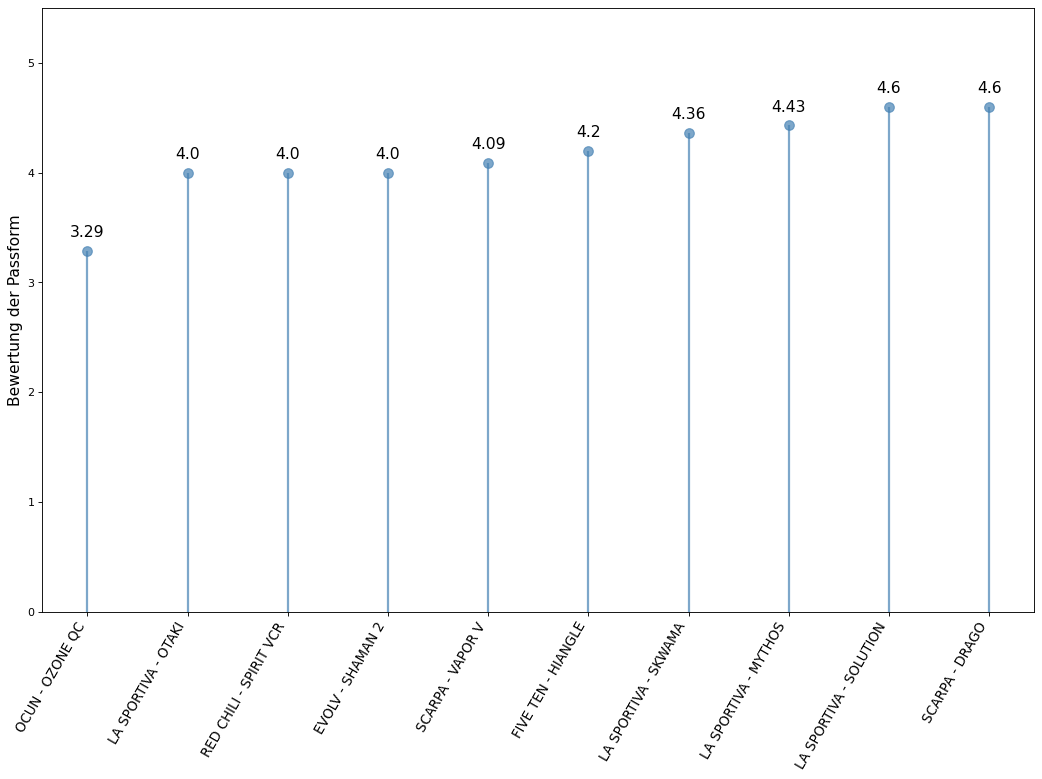

In [116]:
df_top10_count.sort_values(by='overall_rating', inplace=True)
df_top10_count.reset_index(inplace=True, drop=True)
# Draw plot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.vlines(x=df_top10_count.index, ymin=0, ymax=df_top10_count.overall_rating, color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=df_top10_count.index, y=df_top10_count.overall_rating, s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
#ax.set_title('Rating der Top 10', fontdict={'size':22})
ax.set_ylabel('Gesamtbewertung', fontsize=14)
ax.set_xticks(df_top10_count.index)
ax.set_xticklabels(df_top10_count.shoe_model.str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
ax.set_ylim(0, 5.5)

# Annotate
for row in df_top10_count.itertuples():
    ax.text(row.Index, row.overall_rating+.1, s=round(row.overall_rating, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

plt.show()
    
df_top10_count.sort_values(by='rate_fit', inplace=True)
df_top10_count.reset_index(inplace=True, drop=True)
# Draw plot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.vlines(x=df_top10_count.index, ymin=0, ymax=df_top10_count.rate_fit, color='steelblue', alpha=0.7, linewidth=2)
ax.scatter(x=df_top10_count.index, y=df_top10_count.rate_fit, s=75, color='steelblue', alpha=0.7)

# Title, Label, Ticks and Ylim
#ax.set_title('Rating der Top 10', fontdict={'size':22})
ax.set_ylabel('Bewertung der Passform', fontsize=14)
ax.set_xticks(df_top10_count.index)
ax.set_xticklabels(df_top10_count.shoe_model.str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
ax.set_ylim(0, 5.5)

# Annotate
for row in df_top10_count.itertuples():
    ax.text(row.Index, row.rate_fit+.1, s=round(row.rate_fit, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)
 
    

plt.show()

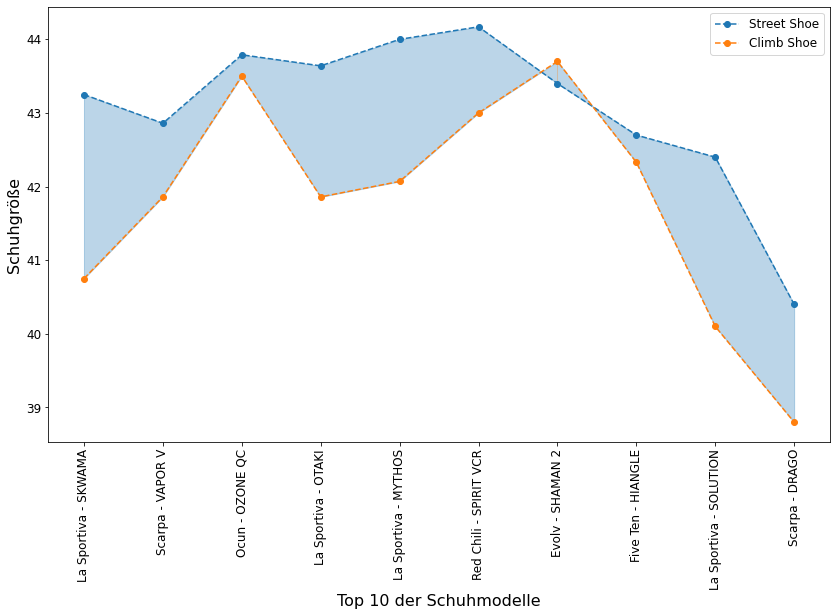

In [118]:
df_top10_count.sort_values(by='count', ascending=False,  inplace=True)
df_top10_count.reset_index(inplace=True, drop=True)

plt.figure(figsize=(14,8))
x = df_top10_count['shoe_model']
y1 = df_top10_count['street_shoe_size']
y2 = df_top10_count['climb_shoe_size']
plt.plot(x,y1 , 'o--')
plt.plot(x,y2 , 'o--')
plt.fill_between(x, y1, y2, color='C0', alpha=0.3)
plt.fill_between(x, y1, y2, where=(y1 < y2), color='C1', alpha=0.3)

plt.legend(['Street Shoe', 'Climb Shoe'], fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(rotation=90, fontsize=12)
plt.xlabel("Top 10 der Schuhmodelle", fontsize=16)
plt.ylabel("Schuhgröße", fontsize=16)
plt.show()

Die Darstellung zeigt die 10 am häufigsten genannten Kletterschuhe. Es sind deutliche Unterschiede zwischen den Straßenschuhgrößen und Kletterschuhgrößen zu erkennen. Letztere fallen inder Regel kleiner aus, wobei nicht bei jedem Modell exakt die gleiche Differenz zu finden ist. Demnach wird ein La Sportiva SKWAMA meistens ca. 2,5 Größen kleiner getragen, während ein VAPOR V von Scarpa nur eine Größe kleiner ausfällt.

# Preprocessing

Für die bessere Visualisierung wurden die Fußtypen als auch die Fehlstellungen in sogenannte Dummy Variablen konvertiert, sodass jedes Merkmal eine eigene Spalte besitzt und durch einen binären code anzeigen kann, ob das Merkmal für eine Beobachtung vorhanden ist oder nicht. Daher können die ursprünglichen Spalten entfernt werden, so wie die Zielvariable \enquote{Schuhmodell}, da diese vorhergesagt werden soll.

In [206]:
df_survey.columns

Index(['timestamp', 'street_shoe_size', 'fav_sneaker_model', 'foot_len',
       'foot_width', 'foot_type', 'foot_deform', 'shoe_brand', 'shoe_model',
       'shoe_model_manual', 'climb_shoe_size', 'shoe_age', 'favourite',
       'vorspann', 'downturn', 'asymetry', 'closure_type', 'climb_style',
       'terrain', 'rate_fit', 'rate_comfort', 'rate_stiffness',
       'use_frequency', 'climbed_grade', 'overall_rating', 'gender', 'height',
       'weight', 'age', 'climbing_exp', 'hallux', 'senkfuß', 'spreizfuß',
       'plattfuß', 'hohlfuß', 'knickfuß', 'ägyptischer', 'römischer',
       'griechischer'],
      dtype='object')

In [207]:
df_prep = df_survey.drop(['timestamp','foot_deform','foot_type','fav_sneaker_model', 'shoe_brand', 'shoe_model',
       'shoe_model_manual', 'climb_shoe_size', 'shoe_age', 'favourite',
       'vorspann', 'downturn', 'asymetry', 'closure_type','rate_fit', 'rate_comfort', 'rate_stiffness',
       'use_frequency', 'climbed_grade', 'overall_rating'], axis=1)
df_prep.head(1)

,street_shoe_size,foot_len,foot_width,climb_style,terrain,gender,height,weight,age,climbing_exp,hallux,senkfuß,spreizfuß,plattfuß,hohlfuß,knickfuß,ägyptischer,römischer,griechischer
0,41.5,25.5,10.0,"Sportklettern, Bouldern",Beides,Männlich,168,61,29,4.0,0,0,0,0,0,0,1,0,0


## Fehlende Werte

In [208]:
df_prep.isnull().sum()

street_shoe_size    0
foot_len            0
foot_width          0
climb_style         0
terrain             0
gender              0
height              0
weight              0
age                 0
climbing_exp        0
hallux              0
senkfuß             0
spreizfuß           0
plattfuß            0
hohlfuß             0
knickfuß            0
ägyptischer         0
römischer           0
griechischer        0
dtype: int64

## Ausreißer

In [209]:
df_prep.select_dtypes(['int64','float64']).columns

Index(['street_shoe_size', 'foot_len', 'foot_width', 'height', 'weight', 'age',
       'climbing_exp', 'hallux', 'senkfuß', 'spreizfuß', 'plattfuß', 'hohlfuß',
       'knickfuß', 'ägyptischer', 'römischer', 'griechischer'],
      dtype='object')

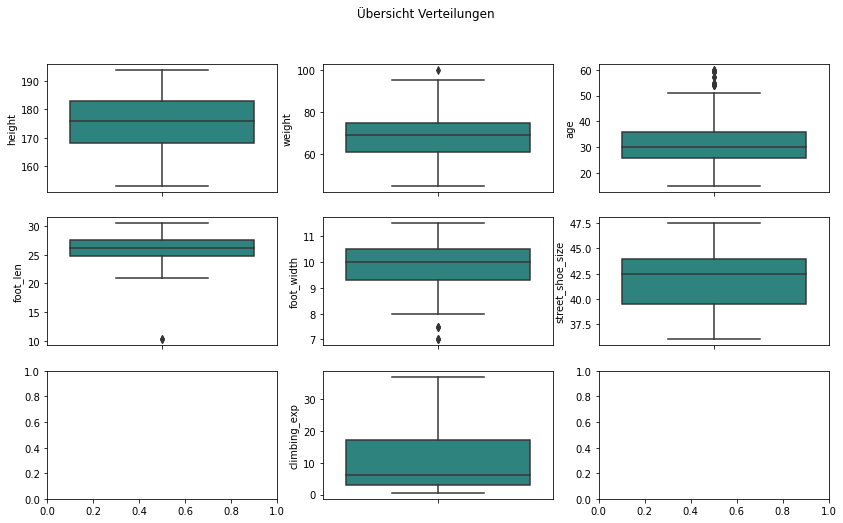

In [210]:
fig, axs = plt.subplots(3, 3, figsize=(14, 8))
fig.suptitle('Übersicht Verteilungen')
sns.boxplot(y='height',data=df_prep,palette='viridis',ax=axs[0,0])
sns.boxplot(y='weight',data=df_prep,palette='viridis',ax=axs[0,1])
sns.boxplot(y='age',data=df_prep,palette='viridis',ax=axs[0,2])
sns.boxplot(y='foot_len',data=df_prep,palette='viridis',ax=axs[1,0])
sns.boxplot(y='foot_width',data=df_prep,palette='viridis',ax=axs[1,1])
sns.boxplot(y='street_shoe_size',data=df_prep,palette='viridis', ax=axs[1,2])
sns.boxplot(y='climbing_exp',data=df_prep,palette='viridis', ax=axs[2,1])

plt.show()

In [211]:
df_prep[df_prep['foot_len'] < 20]

,street_shoe_size,foot_len,foot_width,climb_style,terrain,gender,height,weight,age,climbing_exp,hallux,senkfuß,spreizfuß,plattfuß,hohlfuß,knickfuß,ägyptischer,römischer,griechischer
68,39.5,10.2,9.5,"Sportklettern, Bouldern, Mehrseillängen",Beides,Weiblich,167,62,24,3.0,0,0,0,0,0,0,0,1,0
145,39.5,10.2,9.5,"Sportklettern, Bouldern",Beides,Weiblich,167,62,24,3.0,0,0,0,0,0,0,0,1,0


In [212]:
df_prep.at[68,'foot_len'] = round(df_prep['foot_len'].mean(),2)
df_prep.at[145,'foot_len'] = round(df_prep['foot_len'].mean(),2)
df_prep['foot_len'].iloc[[68,145]]

69     27.0
146    24.0
Name: foot_len, dtype: float64

In [213]:
df_prep[df_prep['foot_width'] < 8]

,street_shoe_size,foot_len,foot_width,climb_style,terrain,gender,height,weight,age,climbing_exp,hallux,senkfuß,spreizfuß,plattfuß,hohlfuß,knickfuß,ägyptischer,römischer,griechischer
26,42.0,22.0,7.0,Bouldern,Halle,Männlich,173,55,15,3.0,0,0,1,0,0,0,0,0,1
43,38.0,23.5,7.5,"Sportklettern, Bouldern",Beides,Weiblich,162,57,25,7.0,0,1,0,0,0,0,1,0,0
100,44.0,27.0,7.0,"Sportklettern, Bouldern",Beides,Männlich,179,81,31,2.0,0,1,0,0,0,0,1,0,0
132,38.0,23.5,7.5,"Sportklettern, Bouldern",Beides,Weiblich,162,57,25,7.0,0,1,0,0,0,0,1,0,0
160,44.0,27.0,7.0,"Sportklettern, Bouldern",Halle,Männlich,179,81,31,2.0,0,1,0,0,0,0,1,0,0
169,38.0,23.5,7.5,"Sportklettern, Bouldern",Beides,Weiblich,162,57,25,7.0,0,1,0,0,0,0,1,0,0


## Kategorien / Ordinalwerte in Zahlen wandeln

In [214]:
df_prep.select_dtypes(['object']).columns

Index(['climb_style', 'terrain', 'gender'], dtype='object')

In [215]:
def strip_list(liste):
    stripped = []
    
    for n in liste:
        stripped.append(n.strip())
    
    return stripped

styles = ['Sportklettern', 'Bouldern', 'Mehrseillängen']
for style in styles:
    df_prep[style.lower().split()[0]] = df_prep.apply(lambda row: 1 if style in strip_list(row.climb_style.split(',')) else 0, axis=1)

df_prep.drop('climb_style',axis=1,inplace=True)
df_prep.head(1)

,street_shoe_size,foot_len,foot_width,terrain,gender,height,weight,age,climbing_exp,hallux,...,spreizfuß,plattfuß,hohlfuß,knickfuß,ägyptischer,römischer,griechischer,sportklettern,bouldern,mehrseillängen
0,41.5,25.5,10.0,Beides,Männlich,168,61,29,4.0,0,...,0,0,0,0,1,0,0,1,1,0


In [216]:
df_prep['terrain'].unique()

array(['Beides', 'Halle', 'Outdoor'], dtype=object)

In [217]:
df_prep['halle'] = df_prep['terrain'].map(lambda row: 1 if row in ['Halle', 'Beides'] else 0)
df_prep['outdoor'] = df_prep['terrain'].map(lambda row: 1 if row in ['Outdoor', 'Beides'] else 0)

df_prep.drop('terrain',axis=1,inplace=True)
df_prep.head(1)

,street_shoe_size,foot_len,foot_width,gender,height,weight,age,climbing_exp,hallux,senkfuß,...,hohlfuß,knickfuß,ägyptischer,römischer,griechischer,sportklettern,bouldern,mehrseillängen,halle,outdoor
0,41.5,25.5,10.0,Männlich,168,61,29,4.0,0,0,...,0,0,1,0,0,1,1,0,1,1


In [218]:
df_prep = pd.get_dummies(data=df_prep, columns=['gender'],drop_first=True)
df_prep

,street_shoe_size,foot_len,foot_width,height,weight,age,climbing_exp,hallux,senkfuß,spreizfuß,...,knickfuß,ägyptischer,römischer,griechischer,sportklettern,bouldern,mehrseillängen,halle,outdoor,gender_Weiblich
0,41.5,25.5,10.0,168,61,29,4.0,0,0,0,...,0,1,0,0,1,1,0,1,1,0
1,38.5,24.2,9.8,168,63,30,3.0,1,0,0,...,0,0,1,0,0,1,0,1,0,1
2,46.0,29.0,10.0,186,72,36,30.0,0,0,0,...,0,0,0,1,1,1,0,1,1,0
3,46.0,29.0,10.0,186,72,36,30.0,0,0,0,...,0,0,0,1,1,1,0,1,1,0
4,42.0,27.0,10.0,178,67,33,3.0,1,0,0,...,0,0,1,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,46.0,29.0,10.0,186,72,36,30.0,0,0,0,...,0,0,0,1,1,0,1,0,1,0
179,43.0,26.5,10.5,183,68,26,10.0,1,0,0,...,0,0,0,1,1,1,0,1,1,0
180,44.0,27.0,10.0,185,75,33,5.0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
181,42.5,26.7,9.9,175,70,27,6.0,0,0,0,...,0,1,0,0,1,1,1,1,1,0


In [219]:
df_prep.select_dtypes(['object']).columns

Index([], dtype='object')

In [220]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 0 to 182
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   street_shoe_size  182 non-null    float64
 1   foot_len          182 non-null    float64
 2   foot_width        182 non-null    float64
 3   height            182 non-null    int64  
 4   weight            182 non-null    int64  
 5   age               182 non-null    int64  
 6   climbing_exp      182 non-null    float64
 7   hallux            182 non-null    int64  
 8   senkfuß           182 non-null    int64  
 9   spreizfuß         182 non-null    int64  
 10  plattfuß          182 non-null    int64  
 11  hohlfuß           182 non-null    int64  
 12  knickfuß          182 non-null    int64  
 13  ägyptischer       182 non-null    int64  
 14  römischer         182 non-null    int64  
 15  griechischer      182 non-null    int64  
 16  sportklettern     182 non-null    int64  
 1

In [221]:
df_prep.shape

(182, 22)

In [222]:
df_survey.shape

(182, 39)

# Modellwahl - Schuhmodell vorhersagen (Klassifikation)

Zunächst wird versucht das relevante Schuhmodell vorherzusagen. Hierfür stehen verschiedene Ansätze zur Verfügung. Der ausbereitete Datensatz wird im Vorfeld in die Trainings-Merkmale X und der vorherzusagenden Zielvariable y aufgeteilt. Anschließend wird die Datenmenge in Trainings- und Testdaten getrennt, um eine Validierung des Modells unmittelbar vornehmen zu können.

Bevor die Trainingsdaten dem Modell übergeben werden können, müssen die Werte skaliert werden. Jedes Merkmal wurde in der Aufbereitungsphase betrachtet und wenn nötig in Zahlen umgewandelt. Alle diese Werte müssen sich für das Modelltraining auf einer einheitlichen Skala befinden, damit die Agorithmen Distanzen zwischen zwei Werten richtig einordnen können.

In [237]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_prep
y= df_survey['shoe_model']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X_train)

## K-Nearest Neighbor

Beim K-Nearest Neighbor Algorithmus wird die Ähnlichkeit einer Beobachtung zu anderen Datenpunkten betrachtet und geprüft, welche Klasse auf Basis der Nachbarn am ehesten zur Beobachtung passt. Je nach dem wie viele Nachbarn (K) für diese Prüfung einbezogen werden sollen unterscheidet sich auch die Entscheidung des Algorithmus bei der Klassifikation.

Die richtige Größe für K festzulegen ist hierbei eine Herausforderung. Wird der Wert zu groß oder zu klein gewählt kann die Vorhersage falsch sein. Eine in der Praxis gängige Herangehensweise für dieses Problem ist die Elbow-Methode. Dabei wird der Wert für K in einer Schleife bis zu einem festgelegten Höchstwert angepasst und der KNN-Algorithmus entsprechend trainiert. Das Ergebnis der Vorhersage wird mit den tatsächlichen Testwerten der Zielvariable abgeglichen und so ermittelt, ob das Modell richtig lag oder nicht. Alle Fehler werden anschließend grafisch dargestellt, wobei sich eine Ellenbogen-artige Kurve ergibt. Jeder Punkt auf der Kurve entspricht einem Wert für K. Anschließend wird der K-Wert mit der niedrigsten Fehlerrate für die weitere Arbeit ausgewählt.

Eine weitere Möglichkeit ist die Nutzung von Machine Learning. Mittels GridSearch kann das Optimum für K ermittelt werden.

### Elbow-Methode

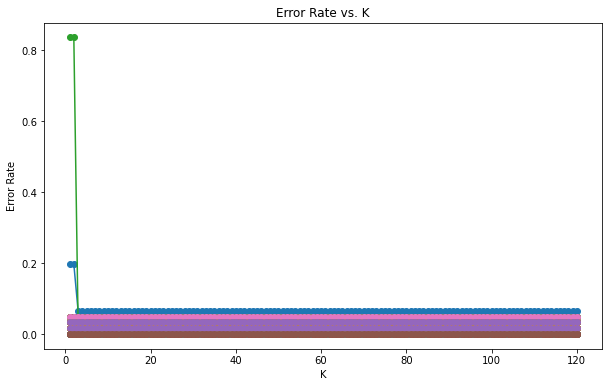

In [270]:
from sklearn.neighbors import KNeighborsClassifier

error_rate = []

k_max = scaled_X.shape[0]

for i in range(1,k_max):
    knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1, metric='cosine', weights='distance')
    knn.fit(scaled_X,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))

plt.plot(range(1,k_max), error_rate, marker='o')
plt.title('Error Rate vs. K')
plt.ylabel('Error Rate')
plt.xlabel('K')
plt.show()

In [280]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1,  metric='cosine', weights='distance')

knn.fit(scaled_X,y_train)


from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=10, shuffle=True, random_state=1)

cv_results = cross_val_score(knn, scaled_X, y_train, cv=kf, scoring="accuracy", n_jobs=-1)

cv_results.mean()

0.075

### GridSearch

Das GridSearch Verfahren sucht in einem Zahlenraum nach dem optimalen Wert für das Verhältnis Zwischen Verzerrung und Varianz, da sich beides nicht ausschließen lässt ist das Ziel immer den besten Trade-Off zu finden.

In [281]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1, metric='cosine', weights='distance')

pipe = Pipeline([("standardizer", scaler), ("knn", knn)])

search_space = [{"knn__n_neighbors": range(1,90)}]

gridsearch = GridSearchCV(pipe, search_space, cv=5, verbose=0).fit(scaled_X, y_train)

gridsearch.best_estimator_.get_params()["knn__n_neighbors"]

2

In [282]:
X = df_prep
y= df_survey['shoe_model']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X_train)

knn = KNeighborsClassifier(n_neighbors=2, n_jobs=-1,  metric='cosine')

knn.fit(scaled_X,y_train)


from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=10, shuffle=True, random_state=1)

cv_results = cross_val_score(knn, scaled_X, y_train, cv=kf, scoring="accuracy", n_jobs=-1)

cv_results.mean()

0.041666666666666664

## Entscheidungsbäume

Baumorientierte Lernalgorithmen sind eine umfangreiche und beliebte Familie von verwandten nichtparametrischen überwachten Methoden zur  Klassifizierung und Regression. Die Basis von baumorientierten Lernern ist der Entscheidungsbaum, in dem eine Reihe von Entscheidungsregeln miteinander verknüpft sind (z.B. "Wenn es regnet...Regenschirm mitnehmen.."). Das Ergebnis sieht etwa wie ein auf dem Kopf stehender Baum aus, wobei die erste  Entscheidungsregel ganz oben steht und sich die nachfolgenden Entscheidungsregeln nach unten hin ausbreiten. In einem Entscheidungsbaum sitzt jede Entscheidungsregel an einem Knoten, wobei die Regel Zweige erzeugt, die zu neuen Knoten führen. Ein Zweig ohne Entscheidungsregel am Ende wird als Blatt bezeichnet.

### Einfacher Klassifikator mittels Entscheidungsbaum

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [257]:
decisiontree = DecisionTreeClassifier(criterion='entropy', random_state=0)

tree_model = decisiontree.fit(scaled_X, y_train)

from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=10, shuffle=True, random_state=1)

cv_results = cross_val_score(decisiontree, scaled_X, y_train, cv=kf, scoring="accuracy", n_jobs=-1)

cv_results.mean()

0.07371794871794872

### Random-Forest-Klassifikator

Ein Random-Forest Algorithmus ist eher eine Ansammlung mehrerer Entscheidungsbäume, die als sogenannter Ensemble-Lerner fungieren. Häufig tritt bei einfachen Entscheidungsbäumen das Problem der Überanpassung (Overfitting) auf. Das kann durch Trainieren mehrerer Entscheidungsbäume mit Bruchteilen der ursprünglichen Trainingsdaten behoben werden, weshalb das Random-Forest Verfahren eine weite Verbreitung fand. 

In [258]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(criterion='entropy',random_state=0, n_jobs=-1, class_weight="balanced")

forest_model = randomforest.fit(scaled_X, y_train)


# Modellbewertung
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=10, shuffle=True, random_state=1)
cv_results = cross_val_score(randomforest, scaled_X, y_train, cv=kf, scoring="accuracy", n_jobs=-1)
cv_results.mean()

0.06538461538461539

Eine weitere Herausforderung in der Praxis sind unausgewogene Klassen. In der deskriptiven Analyse ist bereits aufgefallen, dass viele Modelle nur ein Mal in der Umfrage angegeben wurden, währen die beliebtesten Modelle bis zu 13 Mal vorkamen. Die Klassen sind daher unausgewogen und können dadurch die Lernphase negativ beeinflussen. Für dieses Szenario haben viele Algorithmen aus der scikitlearn Bibliothek Methoden implementiert, die eine Gewichtung der Klassen vornehmen kann. Im obigen Beispiel wird das durch den Parameter class_weight="balanced" ausgedrückt.

### Wichtige Merkmale identifizieren

Der Random-Forest-Klassifizierer ist in der Lage die Relevanz der ihm übermittelten Merkmale zu ermitteln.

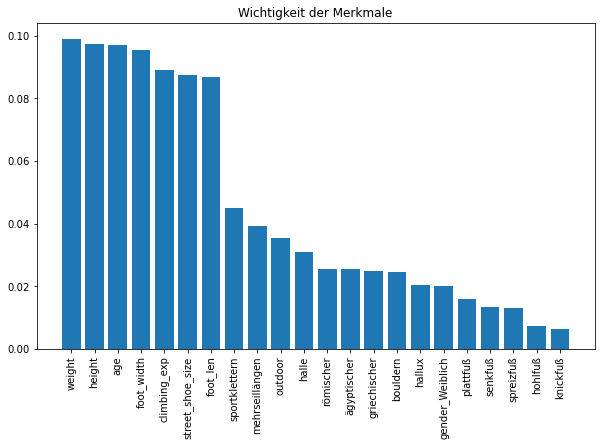

In [259]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)

forest_model = randomforest.fit(scaled_X, y_train)

importances = forest_model.feature_importances_

indices = np.argsort(importances)[::-1]

names = [X.columns[i] for i in indices]

plt.figure(figsize=(10, 6))
plt.title("Wichtigkeit der Merkmale")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()


## Klassifizierung mittels Neuronalem Netz

Für das Training eines neuronalen Netzes werden die Merkmale eines jeden Schuhs als eigene Spalte benötigt. Hierfür wird das 1-Hot-Coding Verfahren verwendet, um aus jedem Schuhmodell eine Spalte zu erstellen, die beim betroffenen Schuh dje Beobachtung eine 1 enthält und bei allen anderen eine 0. Die 1 signalisiert demnach den aktuell genutzten Schuh einer Beobachtung, während alle anderen nicht relevant sind und daher 0 sind.

In [260]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

X = df_prep.values
y= pd.get_dummies(data=df_survey['shoe_model'],drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X_train)

scaled_X.shape

(121, 22)

In [261]:
y_train.shape

(121, 76)

In [263]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()

network.add(layers.Dense(units=150, 
                         activation="relu",
                        input_shape=(22,)))

network.add(layers.Dense(units=150, activation="relu"))
network.add(layers.Dense(units=76, activation="softmax"))

network.compile(loss="categorical_crossentropy",
               optimizer="rmsprop",
               metrics=["accuracy"])

history = network.fit(scaled_X, 
                      y_train,
                     epochs=100,
                     verbose=0,
                     batch_size=10,
                     validation_data=(X_test, y_test))

### Trainingsverlauf visualisieren

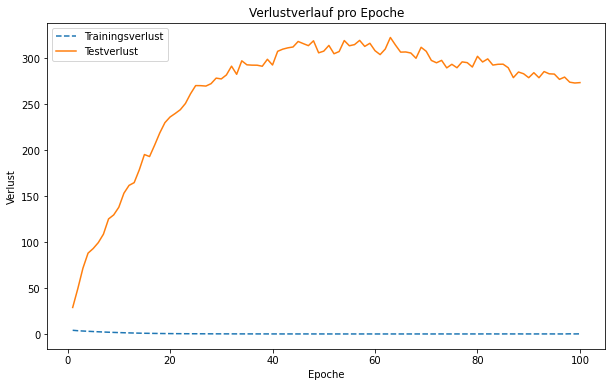

In [264]:
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

epoc_count = range(1, len(training_loss) +1)

plt.figure(figsize=(10,6))
plt.title("Verlustverlauf pro Epoche")
plt.plot(epoc_count, training_loss, "--")
plt.plot(epoc_count, test_loss)
plt.legend(["Trainingsverlust", "Testverlust"])
plt.xlabel("Epoche")
plt.ylabel("Verlust")
plt.show()

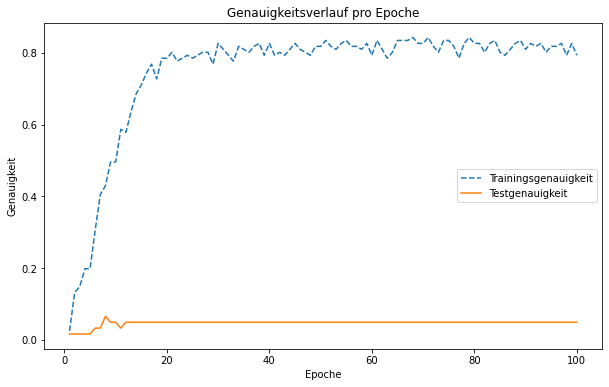

In [265]:
traning_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]

plt.figure(figsize=(10,6))
plt.title("Genauigkeitsverlauf pro Epoche")
plt.plot(epoc_count, traning_accuracy, "--")
plt.plot(epoc_count, test_accuracy)
plt.legend(["Trainingsgenauigkeit", "Testgenauigkeit"])
plt.xlabel("Epoche")
plt.ylabel("Genauigkeit")
plt.show()

### Neuronales Netz optimieren - Überanpassung behandeln - Strafmaß

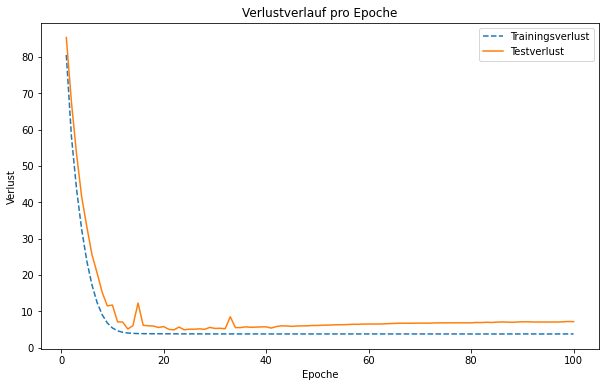

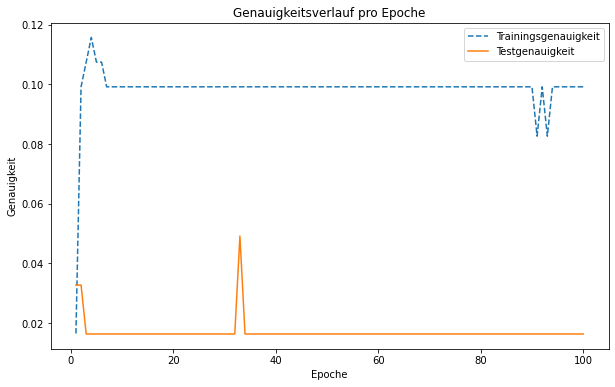

In [266]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers

network = models.Sequential()

network.add(layers.Dense(units=150, 
                         activation="relu",
                         kernel_regularizer=regularizers.l2(0.5),
                        input_shape=(22,)))

network.add(layers.Dense(units=150, activation="relu",  kernel_regularizer=regularizers.l2(0.5)))
network.add(layers.Dense(units=76, activation="softmax"))

network.compile(loss="categorical_crossentropy",
               optimizer="rmsprop",
               metrics=["accuracy"])

history = network.fit(scaled_X, 
                      y_train,
                     epochs=100,
                     verbose=0,
                     batch_size=10,
                     validation_data=(X_test, y_test))


training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

epoc_count = range(1, len(training_loss) +1)

plt.figure(figsize=(10,6))
plt.title("Verlustverlauf pro Epoche")
plt.plot(epoc_count, training_loss, "--")
plt.plot(epoc_count, test_loss)
plt.legend(["Trainingsverlust", "Testverlust"])
plt.xlabel("Epoche")
plt.ylabel("Verlust")
plt.show()

traning_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]

plt.figure(figsize=(10,6))
plt.title("Genauigkeitsverlauf pro Epoche")
plt.plot(epoc_count, traning_accuracy, "--")
plt.plot(epoc_count, test_accuracy)
plt.legend(["Trainingsgenauigkeit", "Testgenauigkeit"])
plt.xlabel("Epoche")
plt.ylabel("Genauigkeit")
plt.show()

### Neuronales Netz optimieren - Überanpassung behandeln - Frühes Stoppen

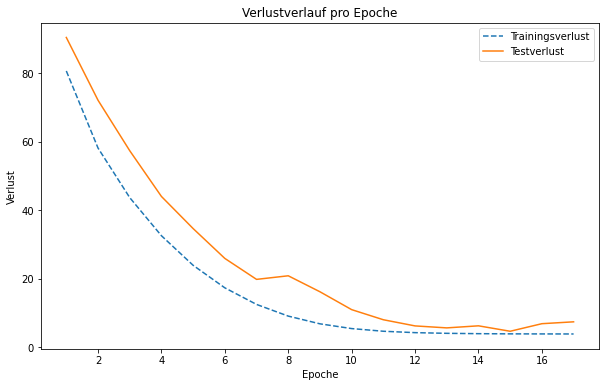

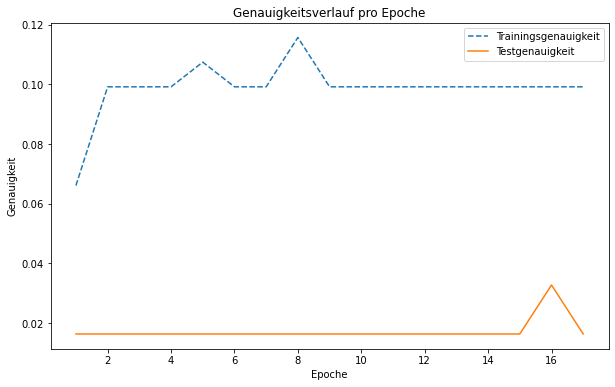

In [267]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

network = models.Sequential()

network.add(layers.Dense(units=150, 
                         activation="relu",
                         kernel_regularizer=regularizers.l2(0.5),
                        input_shape=(22,)))

network.add(layers.Dense(units=150, activation="relu",  kernel_regularizer=regularizers.l2(0.5)))
network.add(layers.Dense(units=76, activation="softmax"))

network.compile(loss="categorical_crossentropy",
               optimizer="rmsprop",
               metrics=["accuracy"])

callbacks = [EarlyStopping(monitor="val_loss", patience=2),
            ModelCheckpoint(filepath="best_model.h5",
                           motitor="val_loss",
                           save_best_only=True)]

history = network.fit(scaled_X, 
                      y_train,
                     epochs=100,
                      callbacks=callbacks,
                     verbose=0,
                     batch_size=10,
                     validation_data=(X_test, y_test))


training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

epoc_count = range(1, len(training_loss) +1)

plt.figure(figsize=(10,6))
plt.title("Verlustverlauf pro Epoche")
plt.plot(epoc_count, training_loss, "--")
plt.plot(epoc_count, test_loss)
plt.legend(["Trainingsverlust", "Testverlust"])
plt.xlabel("Epoche")
plt.ylabel("Verlust")
plt.show()

traning_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]

plt.figure(figsize=(10,6))
plt.title("Genauigkeitsverlauf pro Epoche")
plt.plot(epoc_count, traning_accuracy, "--")
plt.plot(epoc_count, test_accuracy)
plt.legend(["Trainingsgenauigkeit", "Testgenauigkeit"])
plt.xlabel("Epoche")
plt.ylabel("Genauigkeit")
plt.show()

### Neuronales Netz optimieren - Überanpassung behandeln - Dropout

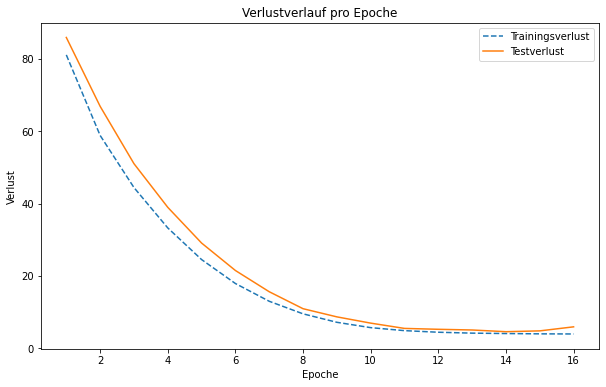

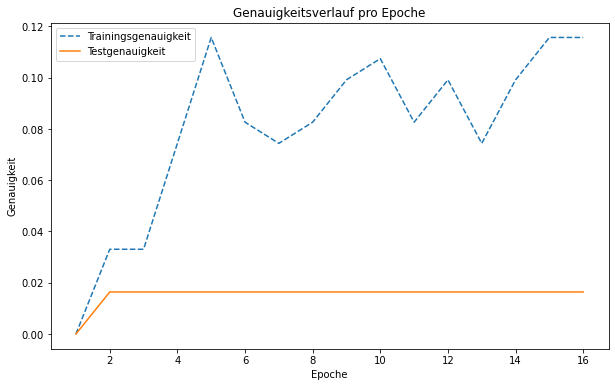

In [268]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

network = models.Sequential()

network.add(layers.Dropout(0.2, input_shape=(22,)))
network.add(layers.Dense(units=150, 
                         activation="relu",
                         kernel_regularizer=regularizers.l2(0.5),
                        input_shape=(22,)))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(units=150, activation="relu",  kernel_regularizer=regularizers.l2(0.5)))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(units=76, activation="softmax"))

network.compile(loss="categorical_crossentropy",
               optimizer="rmsprop",
               metrics=["accuracy"])

callbacks = [EarlyStopping(monitor="val_loss", patience=2),
            ModelCheckpoint(filepath="best_model.h5",
                           motitor="val_loss",
                           save_best_only=True)]

history = network.fit(scaled_X, 
                      y_train,
                     epochs=100,
                     callbacks=callbacks,
                     verbose=0,
                     batch_size=10,
                     validation_data=(X_test, y_test))


training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

epoc_count = range(1, len(training_loss) +1)

plt.figure(figsize=(10,6))
plt.title("Verlustverlauf pro Epoche")
plt.plot(epoc_count, training_loss, "--")
plt.plot(epoc_count, test_loss)
plt.legend(["Trainingsverlust", "Testverlust"])
plt.xlabel("Epoche")
plt.ylabel("Verlust")
plt.show()

traning_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]

plt.figure(figsize=(10,6))
plt.title("Genauigkeitsverlauf pro Epoche")
plt.plot(epoc_count, traning_accuracy, "--")
plt.plot(epoc_count, test_accuracy)
plt.legend(["Trainingsgenauigkeit", "Testgenauigkeit"])
plt.xlabel("Epoche")
plt.ylabel("Genauigkeit")
plt.show()

# Modellwahl - Schuhgröße vorhersagen (Regression)

Bei der Schuhgröße handelt es sich um eine kontinuerliche Zahl. Daher bieten sich Regressionsmodelle für die Vorhersage an. Auch hier gibt es ein breites Spektrum an Machine Learning Methoden, angefangen von der klassischen linearen Regression.

In [283]:
df_prep.columns

Index(['street_shoe_size', 'foot_len', 'foot_width', 'height', 'weight', 'age',
       'climbing_exp', 'hallux', 'senkfuß', 'spreizfuß', 'plattfuß', 'hohlfuß',
       'knickfuß', 'ägyptischer', 'römischer', 'griechischer', 'sportklettern',
       'bouldern', 'mehrseillängen', 'halle', 'outdoor', 'gender_Weiblich'],
      dtype='object')

In [284]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
pd.concat()
X = df_prep
y= df_survey['climb_shoe_size']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X_train)

In [285]:
X_test.iloc[0]

street_shoe_size     43.0
foot_len             27.4
foot_width           10.1
height              182.0
weight               74.0
age                  41.0
climbing_exp         20.0
hallux                0.0
senkfuß               0.0
spreizfuß             0.0
plattfuß              0.0
hohlfuß               0.0
knickfuß              0.0
ägyptischer           1.0
römischer             0.0
griechischer          0.0
sportklettern         0.0
bouldern              1.0
mehrseillängen        0.0
halle                 1.0
outdoor               1.0
gender_Weiblich       0.0
Name: 89, dtype: float64

In [286]:
y_test.iloc[0]

39.5

## Lineare Regression

In [287]:
from sklearn.linear_model import LinearRegression

lregression = LinearRegression()
lregressor = lregression.fit(scaled_X, y_train)


# Modellbewertung
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score

#cv_results = cross_val_score(regression, scaled_X, y_train, scoring="r2", n_jobs=-1)
#cv_results.mean()

mse = mean_squared_error(y_train, lregressor.predict(scaled_X))                    
# report error
print(f"MSE = {mse}")


rmse = mean_squared_error(y_train, lregressor.predict(scaled_X), squared=False)                    
# report error
print(f"RMSE = {rmse}")

MSE = 1.4691955260869192
RMSE = 1.212103760445829


## K-Nearest Neighbor (Regressor)

### K mittels Elbow-Methode ermitteln

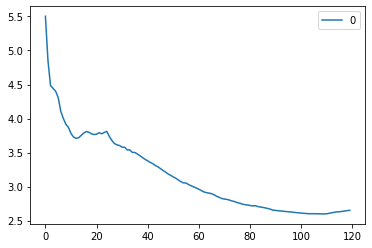

In [296]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

error_rate = []

k_max = scaled_X.shape[0]

#for i in range(1,k_max):
#    knn = KNeighborsRegressor(n_neighbors=i, n_jobs=-1, metric='cosine', weights='distance')
#    knn.fit(scaled_X,y_train)
#    pred_i = knn.predict(X_test)
#    error_rate.append(np.mean(pred_i != y_test))
    




rmse_val = [] #to store rmse values for different k
for i in range(1,scaled_X.shape[0]):
    knn = KNeighborsRegressor(n_neighbors=i,  n_jobs=-1)

    knn.fit(scaled_X, y_train)  #fit the model
    pred=knn.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()
plt.show()

In [339]:
knn = KNeighborsRegressor(n_neighbors=100,  n_jobs=-1)
knn.fit(scaled_X, y_train)

pred=knn.predict(X_test)

error = sqrt(mean_squared_error(y_test,pred))

print(f"RMSE: {error}")

RMSE: 2.614492651313155


In [333]:
knn.predict(X_test)

array([41.4075, 41.3875, 41.3875, 41.4075, 41.4075, 41.4075, 41.4075,
       41.4075, 41.3875, 41.4075, 41.4075, 41.4075, 41.4075, 41.4125,
       41.4075, 41.4075, 41.4075, 41.4075, 41.4075, 41.4075, 41.4075,
       41.4075, 41.4075, 41.4075, 41.4075, 41.4075, 41.4075, 41.3875,
       41.4075, 41.4075, 41.4075, 41.4125, 41.4125, 41.4075, 41.4125,
       41.4075, 41.4075, 41.4075, 41.4075, 41.4075, 41.4075, 41.4075,
       41.4075, 41.4075, 41.3875, 41.4075, 41.4075, 41.4075, 41.4075,
       41.4125, 41.4075, 41.4125, 41.4075, 41.4075, 41.4075, 41.4075,
       41.4075, 41.4075, 41.4075, 41.4075, 41.4075])

### K mittels Gridsearch ermitteln

In [340]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':range(1,90)}

knn = KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(scaled_X,y_train)
model.best_params_

{'n_neighbors': 8}

In [341]:
knn = KNeighborsRegressor(n_neighbors=8,  n_jobs=-1)
knn.fit(scaled_X, y_train)

pred=knn.predict(X_test)

error = sqrt(mean_squared_error(y_test,pred))

print(f"RMSE: {error}")

RMSE: 4.001917432337391


## Regression mittels Entscheidungsbaum

In [74]:
from sklearn.tree import DecisionTreeRegressor

decisiontree = DecisionTreeRegressor(criterion="mse", random_state=0)
tree_model = decisiontree.fit(scaled_X, y_train)


# Modellbewertung
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_train, tree_model.predict(scaled_X))                    
# report error
print(f"MSE = {mse}")

rmse = mean_squared_error(y_train, tree_model.predict(scaled_X), squared=False)                    
# report error
print(f"RMSE = {rmse}")

MSE = 0.061414187327823694
RMSE = 0.24781885991147584


In [75]:
observation = [[38.5,22.8,8.0,168.0,63.0,31.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0]]

scaler = StandardScaler()
ob_scaled = scaler.fit_transform(observation)

tree_model.predict(ob_scaled)

array([41.])

### Random-Forest-Regressor

In [76]:
from sklearn.ensemble import RandomForestRegressor

randomforest = RandomForestRegressor(criterion="mse", random_state=0, n_jobs=-1)
forest_model = randomforest.fit(scaled_X, y_train)


# Modellbewertung
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_train, forest_model.predict(scaled_X))                    
# report error
print(f"MSE = {mse}")

rmse = mean_squared_error(y_train, forest_model.predict(scaled_X), squared=False)                    
# report error
print(f"RMSE = {rmse}")

MSE = 0.24654478043881967
RMSE = 0.4965327586764236


### Wichtigkeit der Merkmale identifizieren

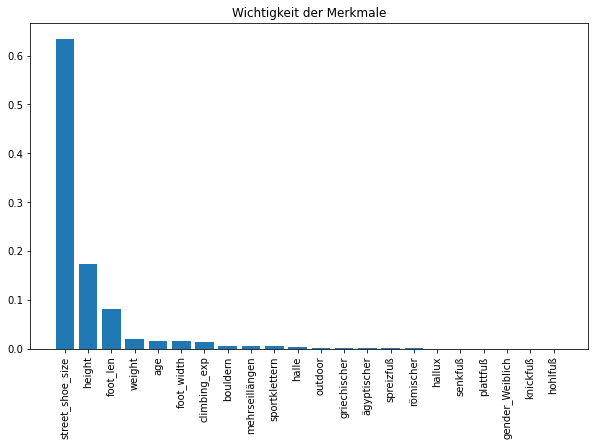

In [77]:
from sklearn.ensemble import RandomForestRegressor

randomforest = RandomForestRegressor(random_state=0, n_jobs=-1)

forest_model = randomforest.fit(scaled_X, y_train)

importances = forest_model.feature_importances_

indices = np.argsort(importances)[::-1]

names = [X.columns[i] for i in indices]

plt.figure(figsize=(10, 6))
plt.title("Wichtigkeit der Merkmale")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_prep.drop(['weight','foot_len','foot_width','age',
       'climbing_exp', 'hallux', 'senkfuß', 'spreizfuß', 'plattfuß', 'hohlfuß',
       'knickfuß', 'ägyptischer', 'römischer', 'griechischer', 'sportklettern',
       'bouldern', 'mehrseillängen', 'halle', 'outdoor', 'gender_Weiblich'], axis=1)
y= df_survey['climb_shoe_size']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X_train)

In [79]:
from sklearn.ensemble import RandomForestRegressor

randomforest = RandomForestRegressor(criterion="mse", random_state=0, n_jobs=-1)
forest_model = randomforest.fit(scaled_X, y_train)


# Modellbewertung
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_train, forest_model.predict(scaled_X))                    
# report error
print(f"MSE = {mse}")

rmse = mean_squared_error(y_train, forest_model.predict(scaled_X), squared=False)                    
# report error
print(f"RMSE = {rmse}")

MSE = 0.5673079774883709
RMSE = 0.7531984980656634


## Regression mittels neuronalem Netz

In [159]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_prep.values
y= df_survey['climb_shoe_size'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X_train)

units = 22
epochs = 120

l1 = 1
l2 = 1

scaled_X.shape

(136, 22)

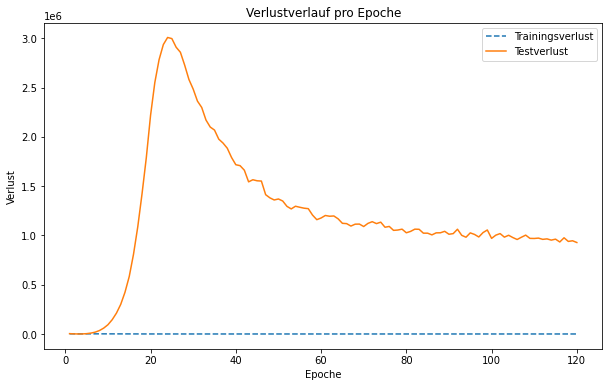

In [160]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()

network.add(layers.Dense(units=units,
                        activation="relu",
                        input_shape=(scaled_X.shape[1],)))
network.add(layers.Dense(units=units,
                        activation="relu"))
network.add(layers.Dense(units=1))

network.compile(loss="mse",
               optimizer="RMSprop",
               metrics=["mse"])

history = network.fit(scaled_X,
                     y_train,
                     epochs=epochs,
                     verbose=0,
                     batch_size=10,
                     validation_data=(X_test, y_test))

training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

epoc_count = range(1, len(training_loss) +1)

plt.figure(figsize=(10,6))
plt.title("Verlustverlauf pro Epoche")
plt.plot(epoc_count, training_loss, "--")
plt.plot(epoc_count, test_loss)
plt.legend(["Trainingsverlust", "Testverlust"])
plt.xlabel("Epoche")
plt.ylabel("Verlust")
plt.show()

### Neuronales Netz optimieren - Strafmaß

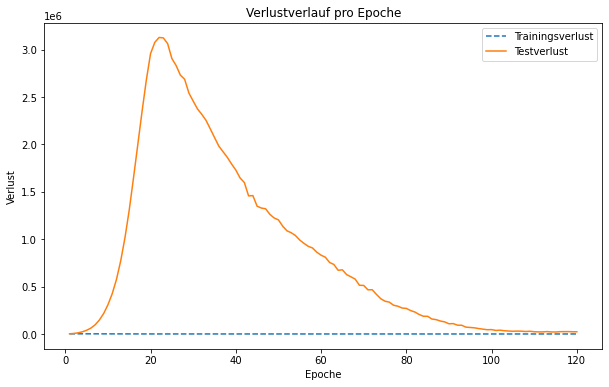

In [161]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()

network.add(layers.Dense(units=units,
                        activation="relu",
                         kernel_regularizer=regularizers.l1_l2(l1=l1, l2=l2),
                        input_shape=(scaled_X.shape[1],)))
network.add(layers.Dense(units=units,
                        activation="relu",
                        kernel_regularizer=regularizers.l1_l2(l1=l1, l2=l2)))
network.add(layers.Dense(units=1))

network.compile(loss="mse",
               optimizer="RMSprop",
               metrics=["mse"])

history = network.fit(scaled_X,
                     y_train,
                     epochs=epochs,
                     verbose=0,
                     batch_size=10,
                     validation_data=(X_test, y_test))

training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

epoc_count = range(1, len(training_loss) +1)

plt.figure(figsize=(10,6))
plt.title("Verlustverlauf pro Epoche")
plt.plot(epoc_count, training_loss, "--")
plt.plot(epoc_count, test_loss)
plt.legend(["Trainingsverlust", "Testverlust"])
plt.xlabel("Epoche")
plt.ylabel("Verlust")
plt.show()

### Neuronales Netz optimieren - Frühes Stoppen

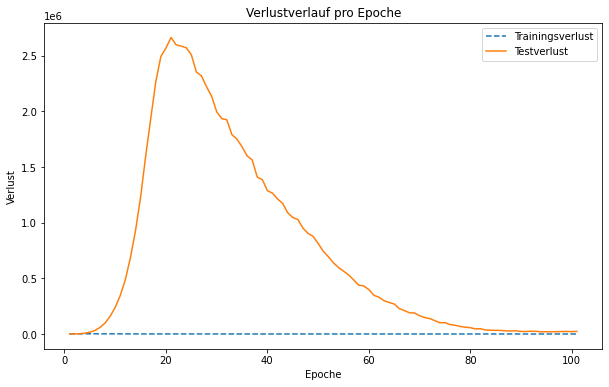

In [162]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


network = models.Sequential()

network.add(layers.Dense(units=units,
                        activation="relu",
                         kernel_regularizer=regularizers.l1_l2(l1=l1, l2=l2),
                        input_shape=(scaled_X.shape[1],)))
network.add(layers.Dense(units=units,
                        activation="relu",
                        kernel_regularizer=regularizers.l1_l2(l1=l1, l2=l2)))
network.add(layers.Dense(units=1))

network.compile(loss="mse",
               optimizer="RMSprop",
               metrics=["mse"])

callbacks = [EarlyStopping(monitor="val_loss", patience=100),
            ModelCheckpoint(filepath="best_reg_model.h5",
                           monitor="val_loss",
                           save_best_only=True)]

history = network.fit(scaled_X,
                     y_train,
                     epochs=epochs,
                     callbacks=callbacks,
                     verbose=0,
                     batch_size=10,
                     validation_data=(X_test, y_test))

training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

epoc_count = range(1, len(training_loss) +1)

plt.figure(figsize=(10,6))
plt.title("Verlustverlauf pro Epoche")
plt.plot(epoc_count, training_loss, "--")
plt.plot(epoc_count, test_loss)
plt.legend(["Trainingsverlust", "Testverlust"])
plt.xlabel("Epoche")
plt.ylabel("Verlust")
plt.show()

### Automatisches Ermitteln der besten Hyperparameter mittels Grid Search

In [169]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

def create_network(optimizer="rmsprop"):
    
    network = models.Sequential()

    network.add(layers.Dense(units=22,
                            activation="relu",
                             kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01),
                            input_shape=(scaled_X.shape[1],)))
    network.add(layers.Dense(units=22,
                            activation="relu",
                            kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)
               ))
    
    network.add(layers.Dense(units=1))

    network.compile(loss="mse",
                   optimizer="RMSprop",
                   metrics=["mse"])

    return network

neural_network = KerasRegressor(build_fn=create_network, verbose=0)

epochs = [5, 10, 50, 100]
batches = [5, 10, 100]
optimizers = ["rmsprop", "adam"]

hyperparameters = dict(optimizer=optimizers, epochs=epochs, batch_size=batches)

grid = GridSearchCV(estimator=neural_network, param_grid=hyperparameters)

grid_result = grid.fit(scaled_X, y_train)

grid_result.best_params_

{'batch_size': 5, 'epochs': 100, 'optimizer': 'rmsprop'}

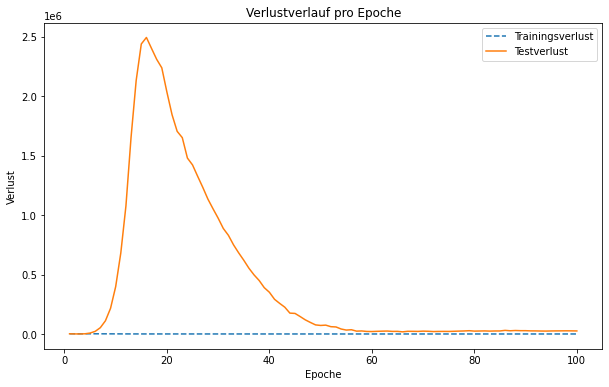

In [171]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_prep.values
y= df_survey['climb_shoe_size'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X_train)

units = 22
epochs = 100
batch_size = 5

l1 = 1
l2 = 1


from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


network = models.Sequential()

network.add(layers.Dense(units=units,
                        activation="relu",
                         kernel_regularizer=regularizers.l1_l2(l1=l1, l2=l2),
                        input_shape=(scaled_X.shape[1],)))
network.add(layers.Dense(units=units,
                        activation="relu",
                        kernel_regularizer=regularizers.l1_l2(l1=l1, l2=l2)))
network.add(layers.Dense(units=1))

network.compile(loss="mse",
               optimizer="RMSprop",
               metrics=["mse"])

#callbacks = [EarlyStopping(monitor="val_loss", patience=100),
#            ModelCheckpoint(filepath="best_reg_model.h5",
#                           monitor="val_loss",
#                           save_best_only=True)]

history = network.fit(scaled_X,
                     y_train,
                     epochs=epochs,
                     callbacks=callbacks,
                     verbose=0,
                     batch_size=batch_size,
                     validation_data=(X_test, y_test))

training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

epoc_count = range(1, len(training_loss) +1)

plt.figure(figsize=(10,6))
plt.title("Verlustverlauf pro Epoche")
plt.plot(epoc_count, training_loss, "--")
plt.plot(epoc_count, test_loss)
plt.legend(["Trainingsverlust", "Testverlust"])
plt.xlabel("Epoche")
plt.ylabel("Verlust")
plt.show()